In [331]:
from collections import Counter
from user_agents import parse
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np
import ndjson
import json

# An explotartory analysis to data of State of JS for years 2016,2018,2018 & 2019

The data comes inside a ndjson and is completetly anonymous.  
For the first we will explore the data of 2016.

In [150]:
with open('state-of-js-2019/state_of_js_2016_normalized_responses_anon.ndjson') as file:
    data = ndjson.load(file)

In [151]:
df = pd.read_json(ndjson.dumps(data),lines=True)

Inside in a pandas DataFrame will be easy to manipulate the information.
The dimensions/columns that we have are as follow:

In [152]:
df.columns

Index(['browser_type', 'createdAt', 'happiness', 'opinions', 'other_tools',
       'platform', 'sections_other_tools', 'survey', 'tools', 'updatedAt',
       'user_agent', 'user_info', 'year'],
      dtype='object')

Let's see each of them:

For _broser type_ we've only thee possible values

In [59]:
df.browser_type.unique()

array(['default', 'touch', 'fallback'], dtype=object)

**createdAt** and **updatedAt** are simply timestamps, if we want to analyze the comfort of the participants and how long did they taked to finish the survey this would be very easy.

Now, for **happiness**:

In [60]:
df.happiness[0]

{'javascript_flavors': 3,
 'front_end_frameworks': 2,
 'state_management': 0,
 'data_layer': 3,
 'backend_frameworks': 1,
 'testing': 2,
 'css': 2,
 'build_tools': 3,
 'mobile_desktop': 3}

In [62]:
df.happiness.apply(lambda x:len(x)).unique()

array([9, 3, 7, 8, 6, 1, 5, 2, 4, 0])

**Happiness** are dictionaties that contains different resonponses. I can't find the original survey and for that reason I can't interpretate the results for key,value. However, going through the survey reports I had been able to find some interpretations for those values. 

In [63]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['javascript_flavors'])
    except:
        A = np.append(A,-1)

In [64]:
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [65]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['front_end_frameworks'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [66]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['state_management'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [67]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['data_layer'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [611]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['state_management'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [68]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['backend_frameworks'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [70]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['testing'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [71]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['css'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [72]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['build_tools'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [73]:
A = np.array([])
for i in df.happiness:
    try:
        A = np.append(A,i['mobile_desktop'])
    except:
        A = np.append(A,-1)
np.unique(A)

array([-1.,  0.,  1.,  2.,  3.,  4.])

Now, over all responses in Hapinness dimension we have only 4 possible values, in this context -1 is a label that I created to denotate that there is no assigned value. So, for this reasons we can think that: (1) Inside the survey is possible go through it without fullfill all the fields and, (2) This field can be related could be somthing like _How able are you to use..?_ or _How much does ... like you?_ or _How much use you ...?_ or maybe is a _Hot Encode_. I'm not able to translate the results because I've no context (even in the [site](https://2019.stateofjs.com/) there is no a clear explanation and the survey is no more avaible to can infer the meaning of each field; I'm going to suggest the documentation of the raw data. 

Next we have the **opinions** field.

In [74]:
df.opinions[0]

{'js_moving_in_right_direction': 2,
 'building_js_apps_overly_complex': 2,
 'js_over_used_online': 4,
 'enjoy_building_js_apps': 2,
 'would_like_js_to_be_main_lang': 2,
 'js_ecosystem_changing_to_fast': 3,
 'survey_too_long': 3}

In [608]:
def tC(x,key):
    try:
        return x[key]
    except:
        return 0

In [610]:
df.opinions.apply(lambda x:tC(x,'js_moving_in_right_direction')).unique()

array([2, 3, 1, 4, 0])

In [76]:
df.opinions.apply(lambda x:len(x)).unique()

array([7, 6, 0, 5, 2, 1, 4, 3])

Again are dictionaries, we can analyze each of the key,value tuple. 

In [101]:
def describe_values(x,key):
    """
    This function says us whis values can get in a dict for a key
    """
    A = np.array([])
    for i in x:
        try:
            A = np.append(A,i[key])
        except:
            A = np.append(A,'-1')
    return np.unique(A)

In [81]:
for i in df.opinions[0]:
    print(i,':',describe_values(df.opinions,i))

js_moving_in_right_direction : [-1.  0.  1.  2.  3.  4.]
building_js_apps_overly_complex : [-1.  0.  1.  2.  3.  4.]
js_over_used_online : [-1.  0.  1.  2.  3.  4.]
enjoy_building_js_apps : [-1.  0.  1.  2.  3.  4.]
would_like_js_to_be_main_lang : [-1.  0.  1.  2.  3.  4.]
js_ecosystem_changing_to_fast : [-1.  0.  1.  2.  3.  4.]
survey_too_long : [-1.  0.  1.  2.  3.  4.]


Again, this can be a raking clasification or hot-encode.

The next one is **other tools**

In [87]:
df.other_tools[0]

{}

In [91]:
df.other_tools.apply(lambda x:len(x)).unique()

array([0])

Here there is no information at all.

Now **plataform**

In [93]:
df.platform.unique()

array(['other', 'mobile', 'tablet'], dtype=object)

**sections_other_tools**

In [96]:
df.sections_other_tools.apply(lambda x:len(x)).unique()

array([0, 1, 3, 4, 8, 5, 2, 7, 6])

In [102]:
for i in df.sections_other_tools[37]:
    print(i,':',describe_values(df.sections_other_tools,i))

front_end_frameworks : ['-1' 'adonis' 'ampersand' 'angular' 'aurelia' 'babel' 'backbone' 'batman'
 'bem' 'bootstrap' 'browserify' 'canjs' 'cerebral' 'chai' 'choo' 'cyclejs'
 'd3' 'dart' 'django' 'dojo' 'donejs' 'durandal' 'electron' 'elixir' 'elm'
 'ember' 'enyo' 'erlang' 'express' 'extjs' 'feathers' 'firebase' 'flight'
 'flux' 'foundation' 'grunt' 'gulp' 'hoodie' 'horizon' 'immutable'
 'inferno' 'ionic' 'jasmine' 'jquery' 'kendo' 'keystone' 'knockout'
 'laravel' 'lodash' 'loopback' 'marionette' 'marko' 'material design'
 'material-ui' 'mdl' 'mean' 'meteor' 'micro' 'mithril' 'mobx' 'mocha'
 'moment' 'mootools' 'nativescript' 'nodejs' 'om' 'polymer' 'preact'
 'prototype' 'purescript' 'qunit' 'rails' 'ramda' 'react' 'reactnative'
 'reagent' 'redux' 'relay' 'riotjs' 'rxjs' 'sails' 'sass' 'scala'
 'sinonjs' 'threejs' 'typescript' 'underscore' 'vanillajs' 'vuejs' 'vuex'
 'web-components' 'webix' 'webpack']
state_management : ['-1' 'alkali' 'angular' 'angular-1' 'apollo' 'atom' 'aurelia' 'ba

Now **survey**

In [106]:
df.survey.unique()

array(['js'], dtype=object)

The team of _The state of js_ begun the _The state of css_ so the **survey** dimension is only to segment data. 

Now **tools**

In [108]:
df.tools[0]

{'vanillajs': {'experience': 'would_use'},
 'es6': {'experience': 'interested'},
 'coffeescript': {'experience': 'would_not_use'},
 'typescript': {'experience': 'interested'},
 'elm': {'experience': 'interested'},
 'clojurescript': {'experience': 'never_heard'},
 'nofrontendframework': {'experience': 'would_use'},
 'react': {'experience': 'interested'},
 'angular': {'experience': 'not_interested'},
 'ember': {'experience': 'not_interested'},
 'vuejs': {'experience': 'interested'},
 'backbone': {'experience': 'not_interested'},
 'redux': {'experience': 'interested'},
 'mobx': {'experience': 'never_heard'},
 'relay': {'experience': 'never_heard'},
 'rest': {'experience': 'would_use'},
 'firebase': {'experience': 'would_use'},
 'graphql': {'experience': 'would_use'},
 'apollo': {'experience': 'never_heard'},
 'falcor': {'experience': 'never_heard'},
 'horizon': {'experience': 'never_heard'},
 'meteor': {'experience': 'not_interested'},
 'feathers': {'experience': 'not_interested'},
 'done

In [110]:
df.tools.apply(lambda x:len(x)).unique()

array([47,  1])

So, for **tools** we have a evaluation about experience of frameworks.

Now, **user agent** only have the user_agent of each user.We have to parse it.

In [114]:
df.user_agent[0]

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.87 Safari/537.36'

In [115]:
str(parse(df.user_agent[0]))

'PC / Mac OS X 10.12.6 / Chrome 67.0.3396'

And for last we have **user info**.

In [113]:
df.user_info[0]

{'browser_type': 'default',
 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.87 Safari/537.36',
 'platform': 'other',
 'years_of_experience': '2_5',
 'company_size': '50_100',
 'yearly_salary': '0_10'}

Which is only the data of the user as experience, salary and company size.

# Graphical Analysis

We explore the data, we will suposse that the data has the same structure amog all datset (which is no true).

How is the people around js and its frameworks?

In [160]:
def tools_plot(df):
    A = np.array([])
    B = np.array([])
    names, _ = list(zip(*list(df[0].items())))
    for i in df:
        for j in names:
            A = np.append(A,i)
            B = np.append(B,df[i]['experience'])
    return Counter(zip(A,B))

In [162]:
A = np.array([])
B = np.array([])
names, _ = list(zip(*list(df.tools[0].items())))
for i in df.tools:
    for j in names:
        A = np.append(A,j)
        B = np.append(B,i[j]['experience'])
Counter(zip(A,B))

KeyboardInterrupt: 

In [173]:
A = {}
names, _ = list(zip(*list(df.tools[0].items())))
for i in df.tools:
    if len(i)>1:
        for j in names:
            if (j,i[j]['experience']) in A:
                A[(j,i[j]['experience'])] += 1
            else:
                A[(j,i[j]['experience'])] = 1

In [175]:
A= list(A.items())
A.sort(key=lambda x:x[0])

In [181]:
A[:15]

[(('angular', 'interested'), 4074),
 (('angular', 'never_heard'), 121),
 (('angular', 'not_interested'), 4013),
 (('angular', 'would_not_use'), 657),
 (('angular', 'would_use'), 1392),
 (('aphrodite', 'interested'), 532),
 (('aphrodite', 'never_heard'), 9125),
 (('aphrodite', 'not_interested'), 446),
 (('aphrodite', 'would_not_use'), 39),
 (('aphrodite', 'would_use'), 115),
 (('apollo', 'interested'), 1132),
 (('apollo', 'never_heard'), 8270),
 (('apollo', 'not_interested'), 692),
 (('apollo', 'would_not_use'), 26),
 (('apollo', 'would_use'), 137)]

In [186]:
A[0]

(('angular', 'interested'), 4074)

In [199]:
DF = {}
DF['framework'] = []
for i in np.sort(names):
    for j in A:
        if i == j[0][0]:
            if j[0][0] in DF['framework']:
                pass
            else:
                DF['framework'].append(j[0][0])
            try:
                DF[j[0][1]].append(j[1])
            except:
                DF[j[0][1]] = [j[1]]

In [203]:
Clean_Data_Interes = pd.DataFrame(DF)

In [211]:
Clean_Data_Interes.head()

,framework,interested,never_heard,not_interested,would_not_use,would_use
0,angular,4074,121,4013,657,1392
1,aphrodite,532,9125,446,39,115
2,apollo,1132,8270,692,26,137
3,ava,997,8234,574,66,386
4,backbone,1305,360,4834,2524,1234


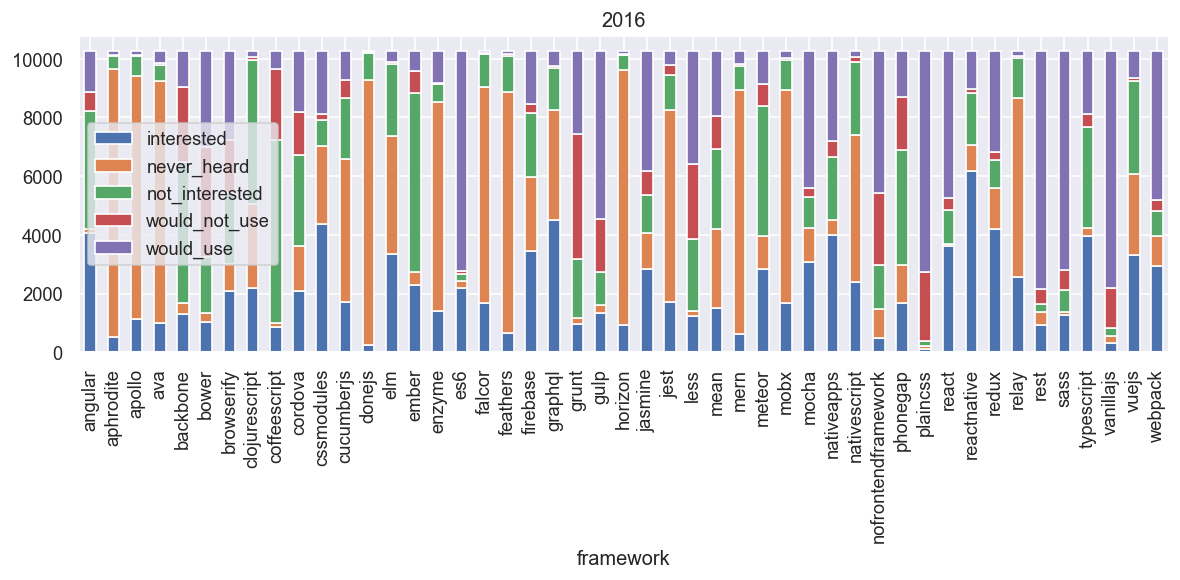

In [703]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes.set_index('framework').plot(kind='bar', stacked=True,ax=ax)
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/framework_dist2016.png',format = 'png',dpi=150)
plt.show()

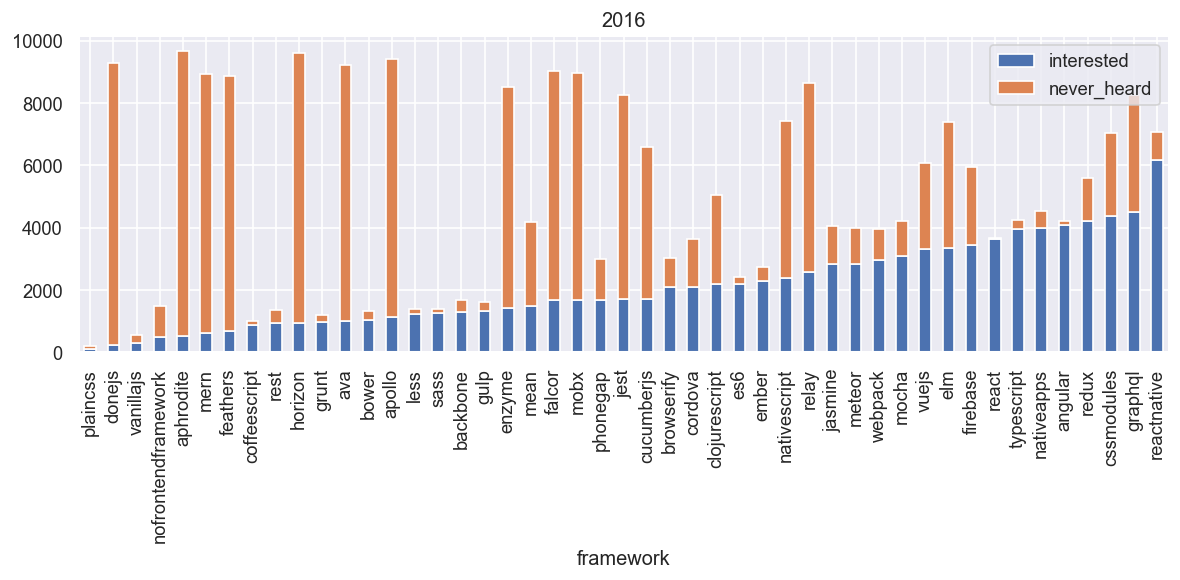

In [704]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','interested','never_heard']].sort_values('interested').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/framework_interesed_dist2016.png',format = 'png',dpi=150)
plt.show()

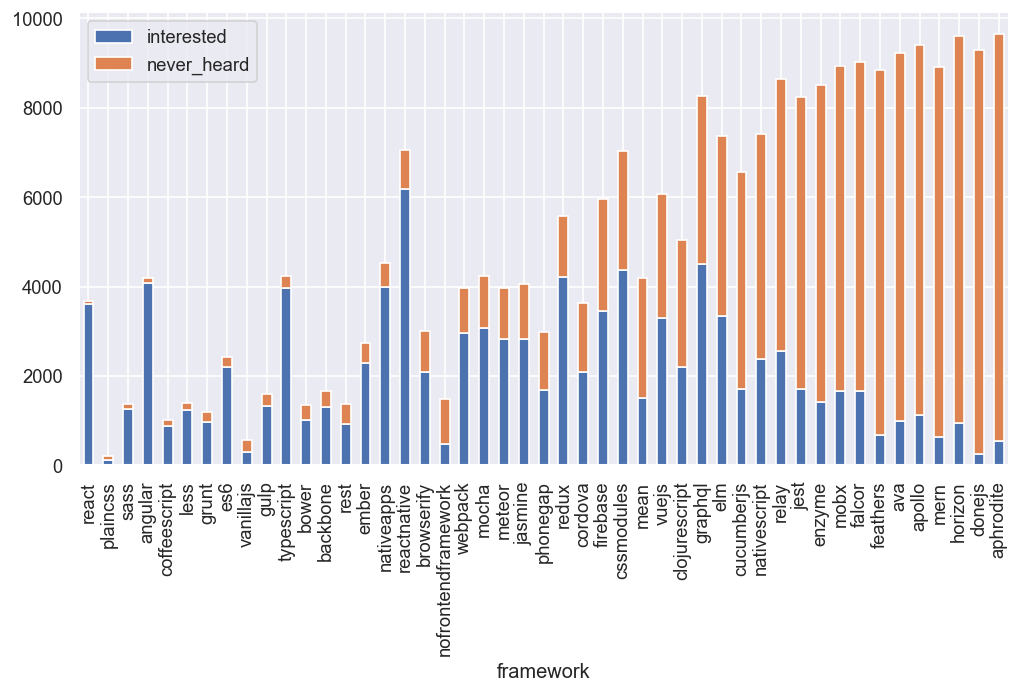

In [218]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','interested','never_heard']].sort_values('never_heard').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
plt.show()

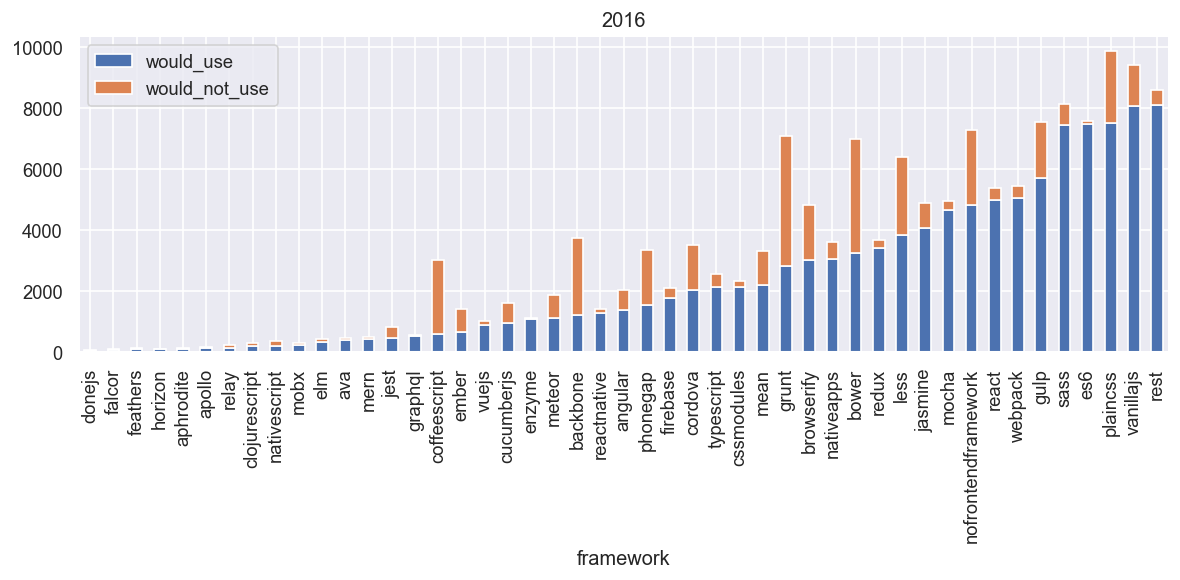

In [705]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','would_use','would_not_use']].sort_values('would_use').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/framework_would_use_dist2016.png',format = 'png',dpi=150)
plt.show()

# Now, let's do an expérimenter around the data user_info.

In [258]:
Counter(df.user_info.apply(lambda x:len(x)))

Counter({6: 4036, 7: 5891, 5: 258, 3: 37, 4: 36})

In [273]:
dummy = {}

In [311]:
for i in df.user_info:
    for j in i:
        if 'company_size' in i and 'years_of_experience' in i and 'yearly_salary' in i:
            try:
                dummy[j].append(i[j])
            except:
                dummy[j] = [i[j]]

In [275]:
dummy.keys()

dict_keys(['browser_type', 'user_agent', 'platform', 'years_of_experience', 'company_size', 'yearly_salary', 'hash'])

In [276]:
len(dummy['years_of_experience'])

9740

In [277]:
len(dummy['company_size'])

9740

In [278]:
len(dummy['yearly_salary'])

9740

In [312]:
len(dummy['user_agent'])

9740

In [313]:
Data_Info = pd.DataFrame(dummy, columns=['years_of_experience','company_size','yearly_salary','user_agent'])

In [314]:
Data_Info['user_agent'] = Data_Info['user_agent'].apply(lambda x:str(parse(x)))

In [315]:
Data_Info.head()

,years_of_experience,company_size,yearly_salary,user_agent
0,2_5,50_100,0_10,PC / Mac OS X 10.12.6 / Chrome 67.0.3396
1,2_5,5_10,10_30,PC / Windows 7 / Chrome 56.0.2924
2,10_20,more_than_1000,100_200,PC / Windows 10 / Chrome 63.0.3239
3,10_20,50_100,100_200,PC / Mac OS X 10.12.6 / Chrome 62.0.3202
4,10_20,more_than_1000,50_100,PC / Mac OS X 10.12.6 / Chrome 62.0.3202


In [289]:
Data_Info.years_of_experience.unique()

array(['2_5', '10_20', '1_2', '5_10', 'less_than_1', 'more_than_20'],
      dtype=object)

In [301]:
dummy = Counter(Data_Info.years_of_experience)
YOE = {}
YOE['years_of_experience'] = []
YOE['number_of_per'] = []
for i in dummy:
    YOE['years_of_experience'].append(i)
    YOE['number_of_per'].append(dummy[i])
YOE = pd.DataFrame(YOE)

In [307]:
YOE['class'] = np.array([3,5,2,4,1,6])

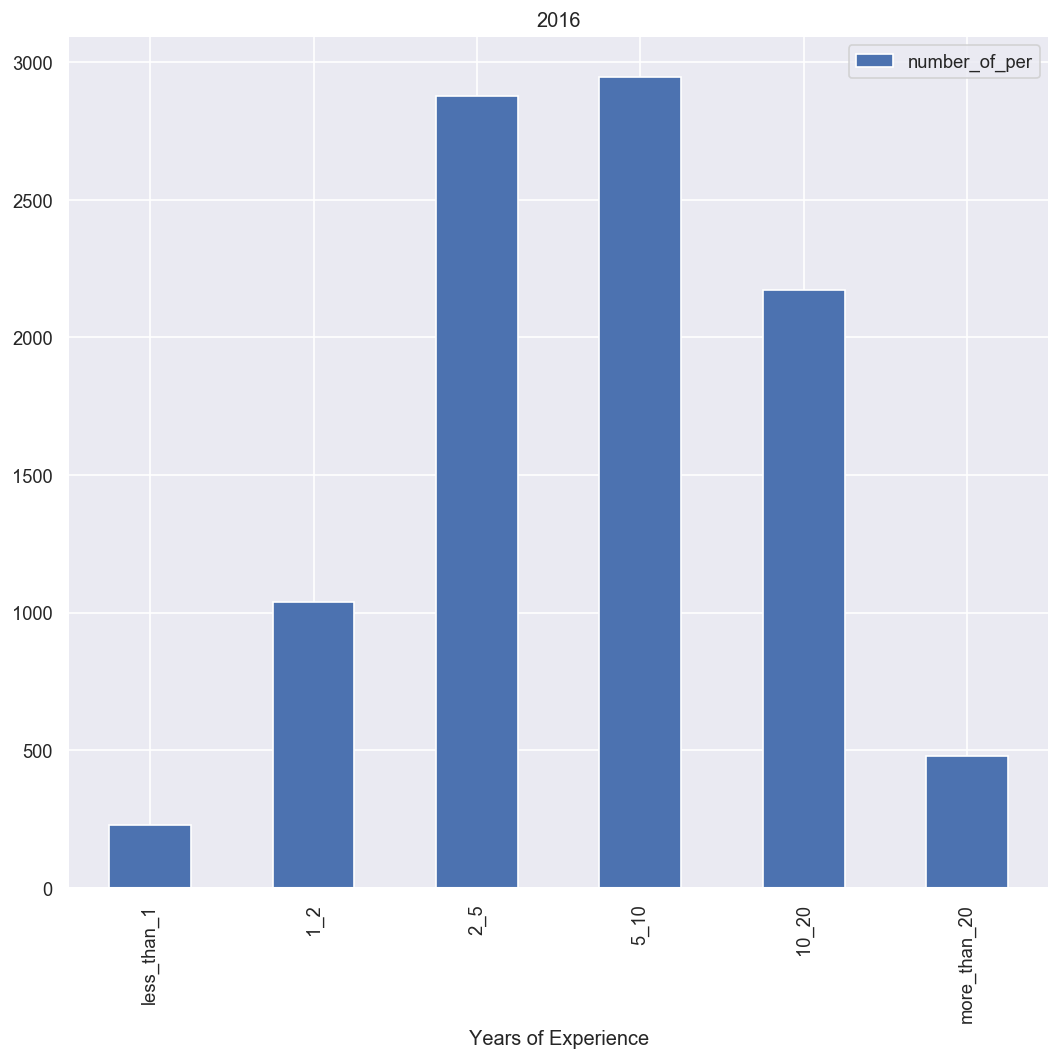

In [706]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = YOE.set_index('years_of_experience').sort_values('class').plot(kind='bar',y='number_of_per',ax=ax)
ax.set_xlabel('Years of Experience')
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/dist_yoe_2016.png',format = 'png',dpi=150)
plt.show()

In [317]:
dummy = Counter(Data_Info.company_size)

In [318]:
dummy

Counter({'50_100': 1157,
         '5_10': 906,
         'more_than_1000': 1389,
         '1': 1140,
         '100_1000': 1755,
         '10_20': 1047,
         '20_50': 1249,
         '1_5': 1097})

In [320]:
CZ = {}
CZ['company_size'] = []
CZ['count'] = []
for i in dummy:
    CZ['company_size'].append(i)
    CZ['count'].append(dummy[i])
CZ = pd.DataFrame(CZ)

In [321]:
CZ

,company_size,count
0,50_100,1157
1,5_10,906
2,more_than_1000,1389
3,1,1140
4,100_1000,1755
5,10_20,1047
6,20_50,1249
7,1_5,1097


In [322]:
CZ['class'] = np.array([6,3,8,1,7,4,5,2])

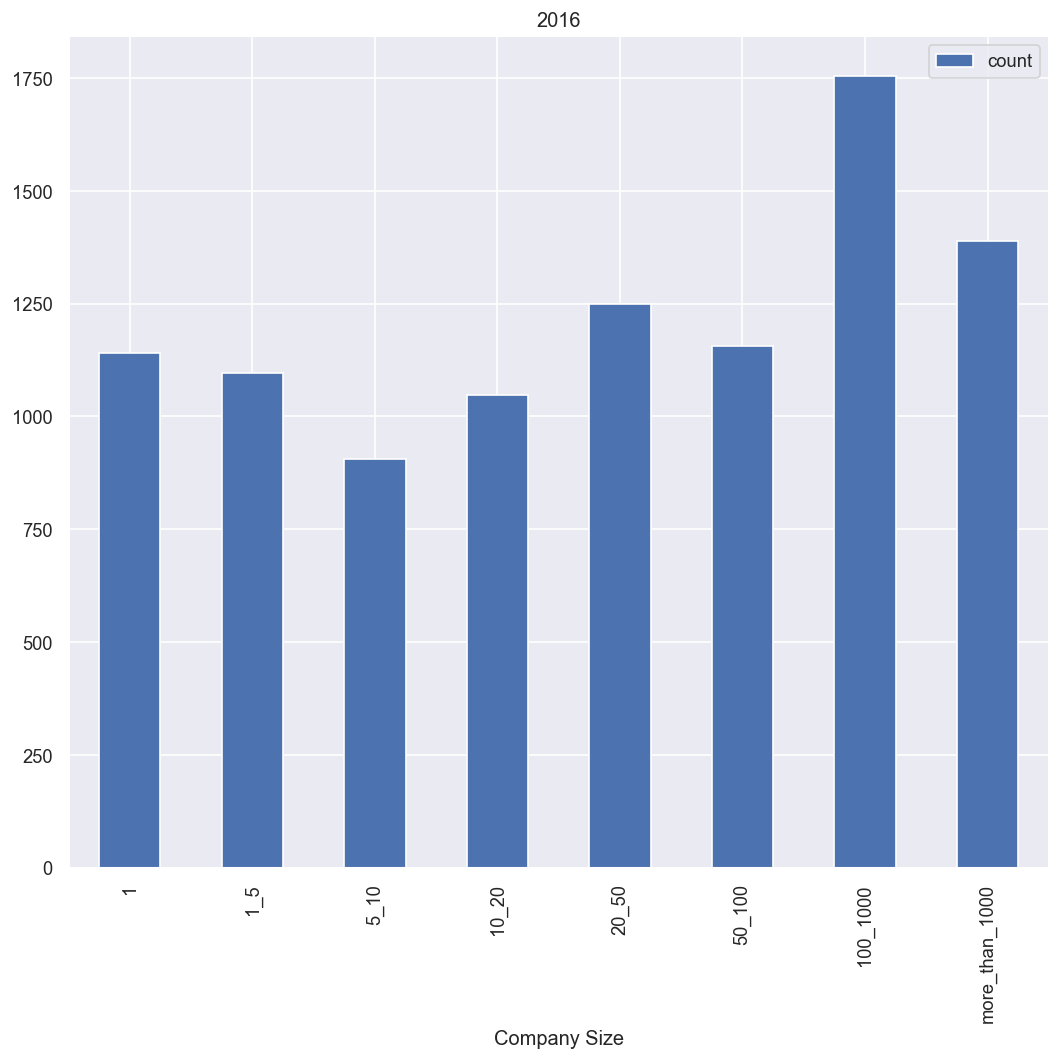

In [702]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = CZ.set_index('company_size').sort_values('class').plot(kind='bar',y='count',ax=ax)
ax.set_xlabel('Company Size')
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/dist_cz_2016.png',format = 'png',dpi=150)
plt.show()

In [326]:
dummy = Counter(Data_Info.yearly_salary)
YS = {}
YS['yearly_salary'] = []
YS['count'] = []
for i in dummy:
    YS['yearly_salary'].append(i)
    YS['count'].append(dummy[i])
YS = pd.DataFrame(YS)

In [327]:
YS

,yearly_salary,count
0,0_10,713
1,10_30,1506
2,100_200,1922
3,50_100,2984
4,work_for_free,699
5,30_50,1739
6,more_than_200,177


In [329]:
YS['class'] = np.array([2,3,6,5,1,4,7])

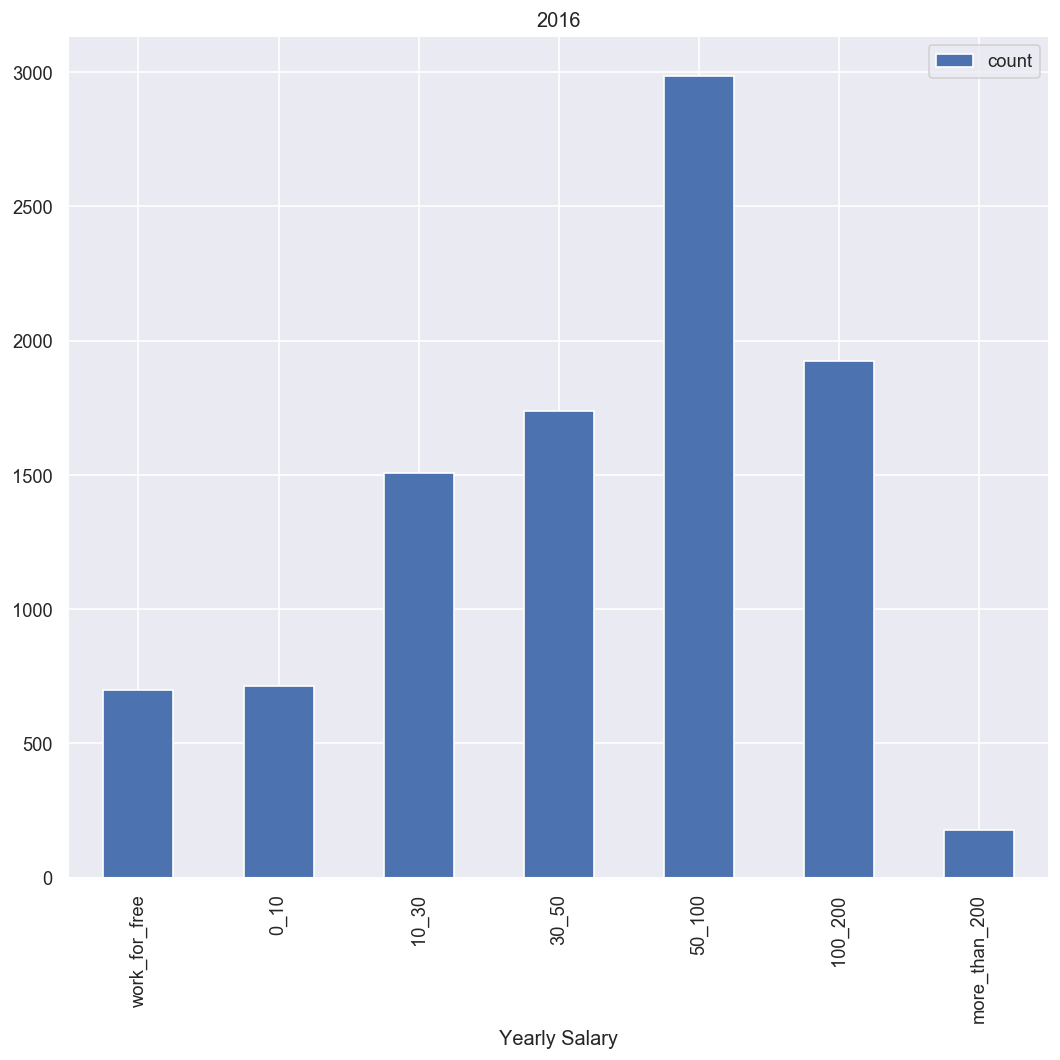

In [707]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = YS.set_index('yearly_salary').sort_values('class').plot(kind='bar',y='count',ax=ax)
ax.set_xlabel('Yearly Salary')
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/dist_ys_2016.png',format = 'png',dpi=150)
plt.show()

?sbn.heatmap

In [338]:
Data_Info.yearly_salary.unique()

array(['0_10', '10_30', '100_200', '50_100', 'work_for_free', '30_50',
       'more_than_200'], dtype=object)

In [339]:
Data_Info.years_of_experience.unique()

array(['2_5', '10_20', '1_2', '5_10', 'less_than_1', 'more_than_20'],
      dtype=object)

In [386]:
Data_Info['Class_YOE'] = Data_Info['years_of_experience']
Data_Info['Class_YS'] = Data_Info['yearly_salary']
Data_Info['Class_CZ'] = Data_Info['company_size']

In [387]:
def detDict(DF,column):
    Dict = {}
    for i,j in zip(DF[column],DF['class']):
        Dict[i] = j-1
    return Dict

In [388]:
Data_Info.columns

Index(['years_of_experience', 'company_size', 'yearly_salary', 'user_agent',
       'Class_YOE', 'Class_YS', 'Class_CZ'],
      dtype='object')

In [390]:
Data_Info['Class_YOE'] = Data_Info['Class_YOE'].replace(detDict(YOE,'years_of_experience'))

In [392]:
Data_Info['Class_YS'] = Data_Info['Class_YS'].replace(detDict(YS,'yearly_salary'))

In [395]:
Data_Info['Class_CZ'] = Data_Info['Class_CZ'].replace(detDict(CZ,'company_size'))

In [457]:
Data_Info.head()

,years_of_experience,company_size,yearly_salary,user_agent,Class_YOE,Class_YS,Class_CZ
0,2_5,50_100,0_10,PC / Mac OS X 10.12.6 / Chrome 67.0.3396,2,1,5
1,2_5,5_10,10_30,PC / Windows 7 / Chrome 56.0.2924,2,2,2
2,10_20,more_than_1000,100_200,PC / Windows 10 / Chrome 63.0.3239,4,5,7
3,10_20,50_100,100_200,PC / Mac OS X 10.12.6 / Chrome 62.0.3202,4,5,5
4,10_20,more_than_1000,50_100,PC / Mac OS X 10.12.6 / Chrome 62.0.3202,4,4,7


In [398]:
len(YOE)

6

In [400]:
htmap_CYOE_CYS = np.zeros((len(YOE),len(YS)))

In [402]:
for i,j in zip(Data_Info['Class_YOE'],Data_Info['Class_YS']):
    htmap_CYOE_CYS[i,j] += 1

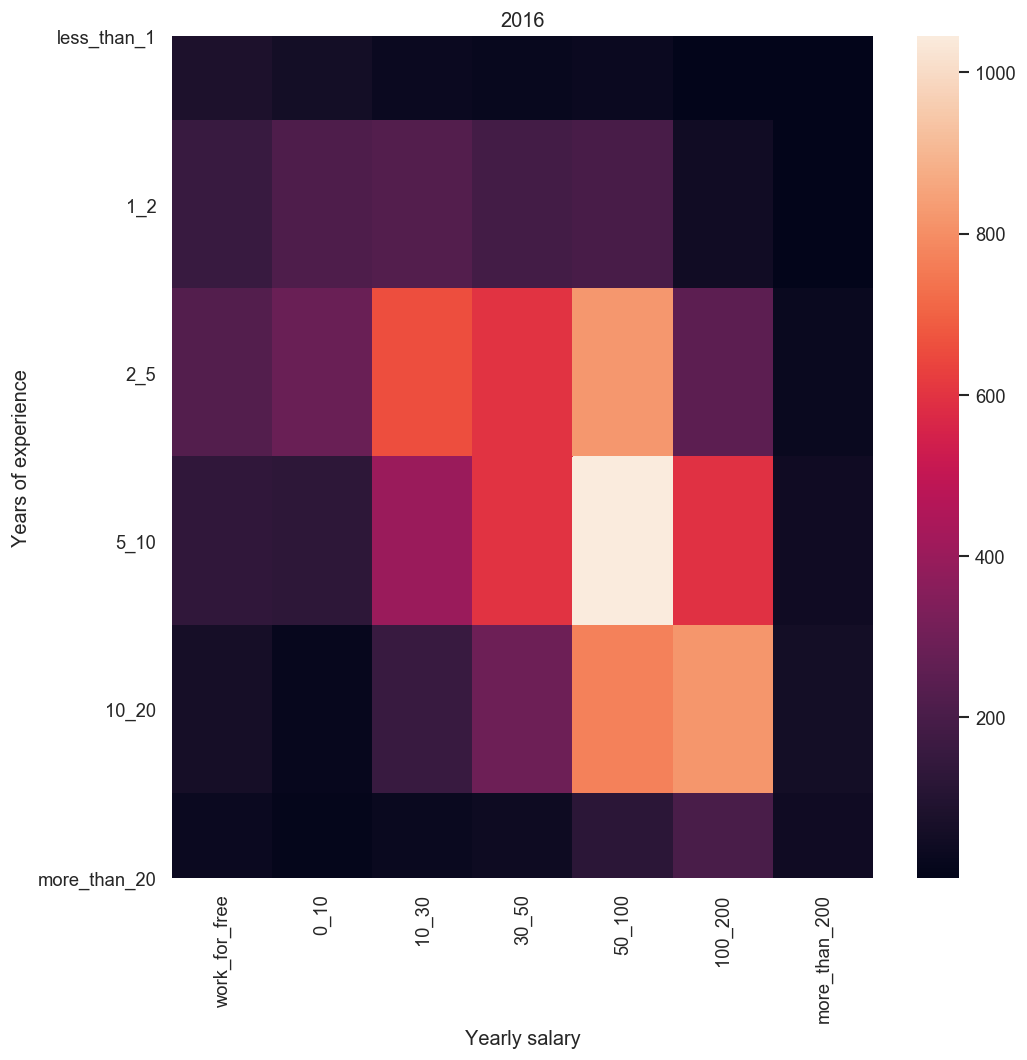

In [719]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = sbn.heatmap(htmap_CYOE_CYS,ax=ax,\
                 xticklabels=YS.sort_values('class')['yearly_salary'],\
                yticklabels=YOE.sort_values('class')['years_of_experience'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_xlabel('Yearly salary')
ax.set_ylabel('Years of experience')
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/hp_yoe_ys_2016.png',format = 'png',dpi=150)
plt.show()

In [455]:
htmap_CZ_CYS = np.zeros((len(YS),len(CZ)))
for i,j in zip(Data_Info['Class_YS'],Data_Info['Class_CZ']):
    htmap_CZ_CYS[i,j] += 1

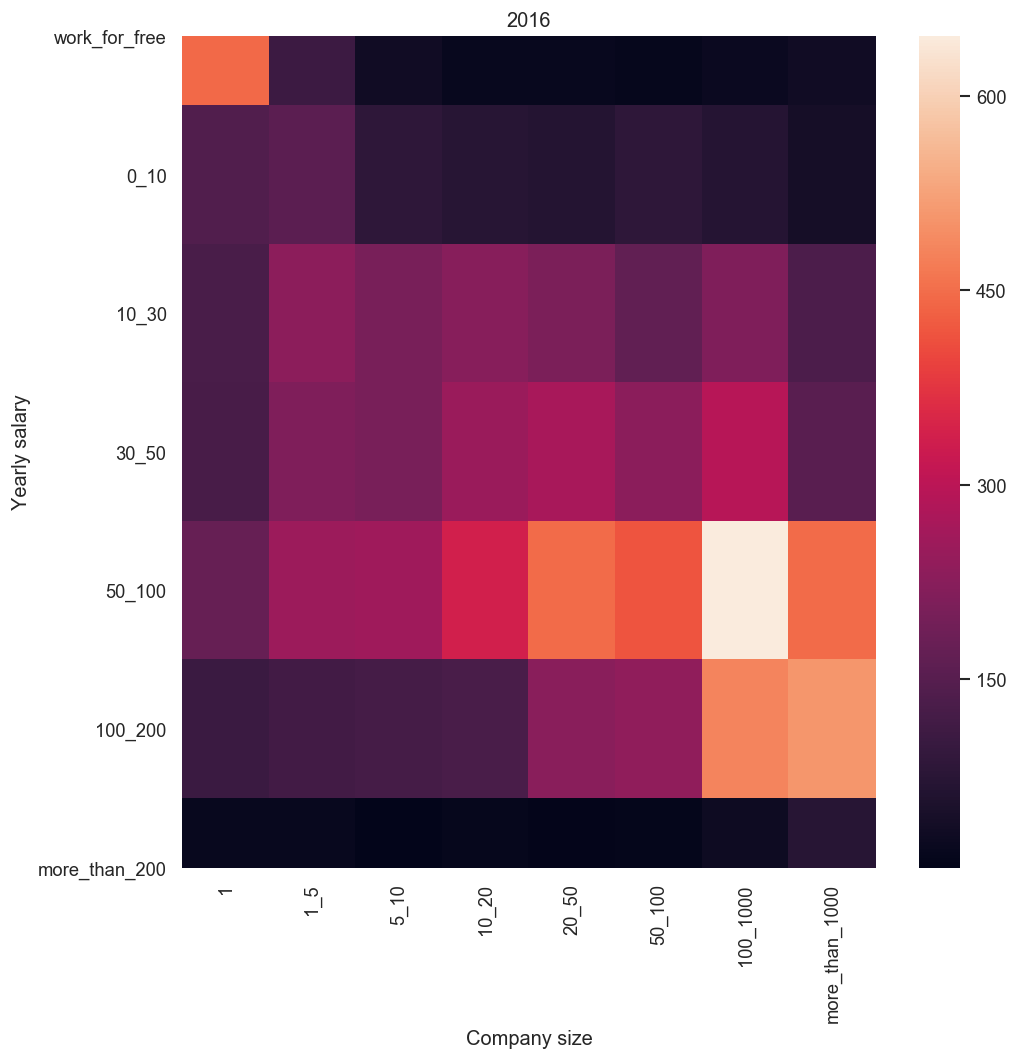

In [709]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = sbn.heatmap(htmap_CZ_CYS,ax=ax,\
                 xticklabels=CZ.sort_values('class')['company_size'],\
                yticklabels=YS.sort_values('class')['yearly_salary'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_ylabel('Yearly salary')
ax.set_xlabel('Company size')
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/hp_ys_cs_2016.png',format = 'png',dpi=150)
plt.show()

In [464]:
htmap_CZ_CYOE = np.zeros((len(YOE),len(CZ)))
for i,j in zip(Data_Info['Class_YOE'],Data_Info['Class_CZ']):
    htmap_CZ_CYOE[i,j] += 1

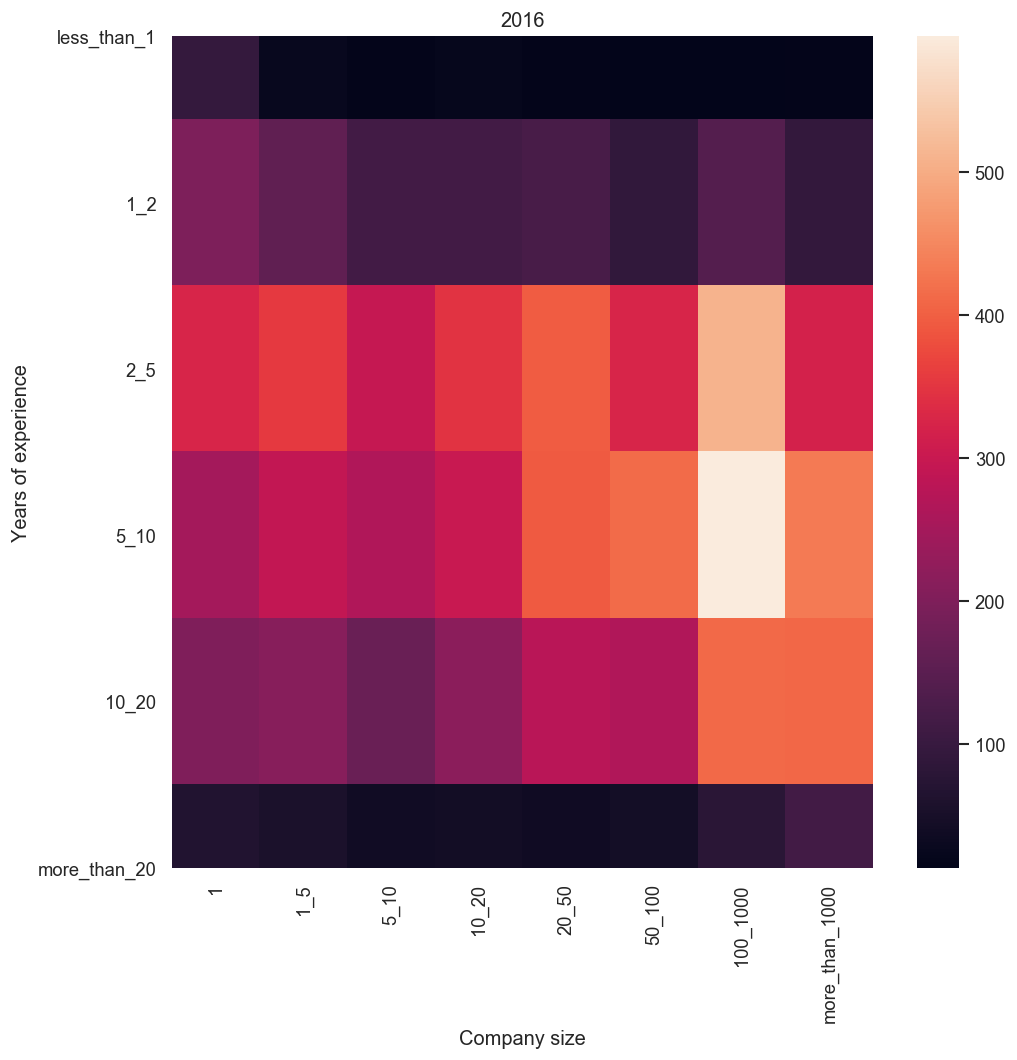

In [710]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = sbn.heatmap(htmap_CZ_CYOE,ax=ax,\
                 xticklabels=CZ.sort_values('class')['company_size'],\
                yticklabels=YOE.sort_values('class')['years_of_experience'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_xlabel('Company size')
ax.set_ylabel('Years of experience')
ax.set_title('2016')
f.tight_layout()
f.savefig(fname='img/2016/hp_cs_yoe_2016.png',format = 'png',dpi=150)
plt.show()

# Now let's check out browser, OS, and dispositive.

In [492]:
dummy = {}
for i in Data_Info.user_agent.apply(lambda x: x.split('/')):
    try:
        dummy[i[0].replace(' ','')] +=1
    except:
        dummy[i[0].replace(' ','')] = 1

In [495]:
dum = {}
for i in dummy:
    if i == 'PC':
        pass
    else:
        try:
            dum['mobile'] += 1
        except:
            dum['mobile'] = 1
        
dum['PC'] = dummy['PC']

In [498]:
dum

{'mobile': 340, 'PC': 7535}

In [502]:
dummy = {}
dummy['dispositive'] = []
dummy['Number_of_Users'] = []
for i in dum:
    dummy['dispositive'].append(i)
    dummy['Number_of_Users'].append(dum[i])

In [504]:
Data_Disp = pd.DataFrame(dummy)

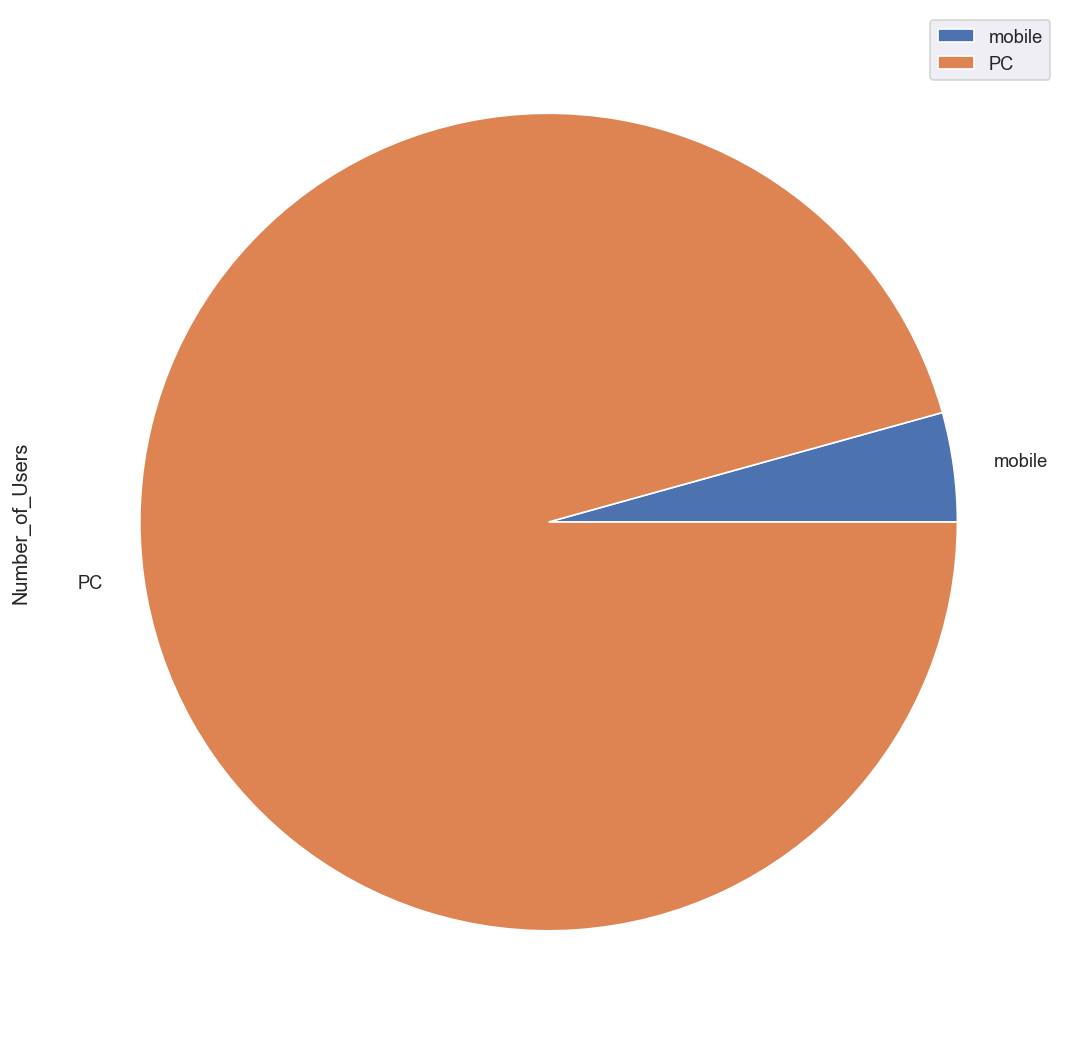

In [711]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = Data_Disp.set_index('dispositive').plot(kind='pie',subplots=True,ax=ax)
f.tight_layout()
f.savefig(fname='img/2016/pie_disp_2016.png',format = 'png',dpi=150)
plt.show()

In [521]:
dummy = {}
for i in Data_Info.user_agent.apply(lambda x: x.split('/')):
    try:
        dummy[i[1].replace(' ','')[:6]] +=1
    except:
        dummy[i[1].replace(' ','')[:6]] = 1

In [522]:
dummy

{'MacOSX': 4049,
 'Window': 2589,
 'iOS10.': 129,
 'Androi': 1136,
 'Linux': 664,
 'Ubuntu': 210,
 'iOS9.3': 879,
 'Fedora': 36,
 'OpenBS': 1,
 'Chrome': 16,
 'iOS8.4': 2,
 'iOS9.2': 7,
 'Firefo': 2,
 'iOS9.1': 1,
 'iOS7.1': 5,
 'iOS8.2': 1,
 'iOS8.1': 2,
 'FreeBS': 1,
 'iOS8.3': 1,
 'iOS6.0': 8,
 'iOS9.0': 1}

In [523]:
dum = {}
for i in dummy:
    if 'iOS' in i:
        try:
            dum['iOS'] += dummy[i]
        except:
            dum['iOS'] = dummy[i]
    else:
        dum[i] = dummy[i]

In [526]:
dummy={}
dummy['OS'] = []
dummy['Number_of_Users'] = []
dummy['Mobile'] = []
for i in dum:
    if 'Andro' in i or 'iOS' in i:
        dummy['Mobile'].append(1)
    else:
        dummy['Mobile'].append(0)
    dummy['OS'].append(i)
    dummy['Number_of_Users'].append(dum[i])

In [529]:
Data_OS = pd.DataFrame(dummy)

In [533]:
Data_OS['Open_Source'] = [0,0,0,1,1,1,1,1,0,1,1]

In [541]:
Data_OS['Open_Source'] = Data_OS['Open_Source'].replace({0:'Non OSS',1:'OSS'})

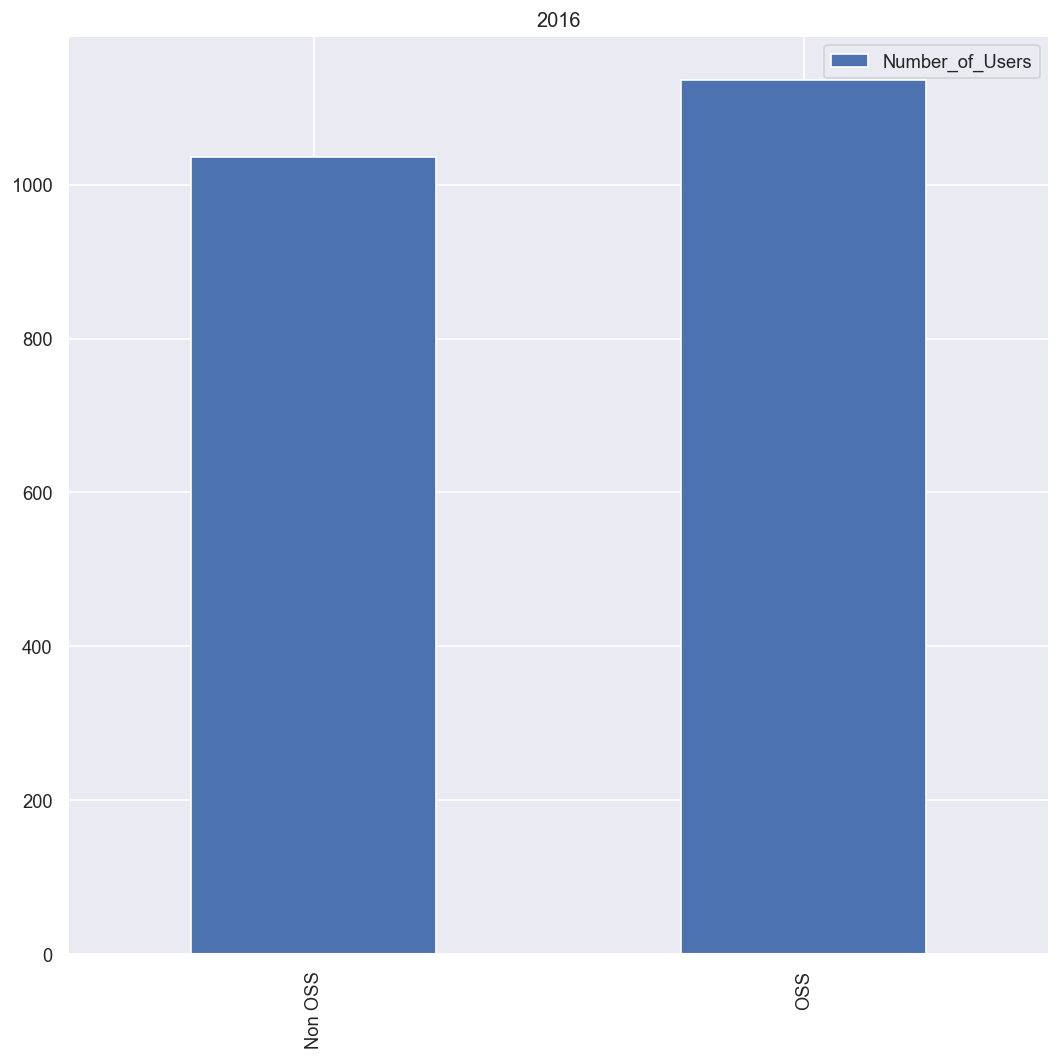

In [712]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
Data_OS[Data_OS.Mobile==1].groupby(by='Open_Source').agg({'Number_of_Users':'sum'}).plot(kind='bar',y='Number_of_Users',ax=ax)
ax.set_title('2016')
ax.set_xlabel('')
f.tight_layout()
f.savefig(fname='img/2016/dist_noss_oss_2016_mobile.png',format='png',dpi=150)
plt.show()

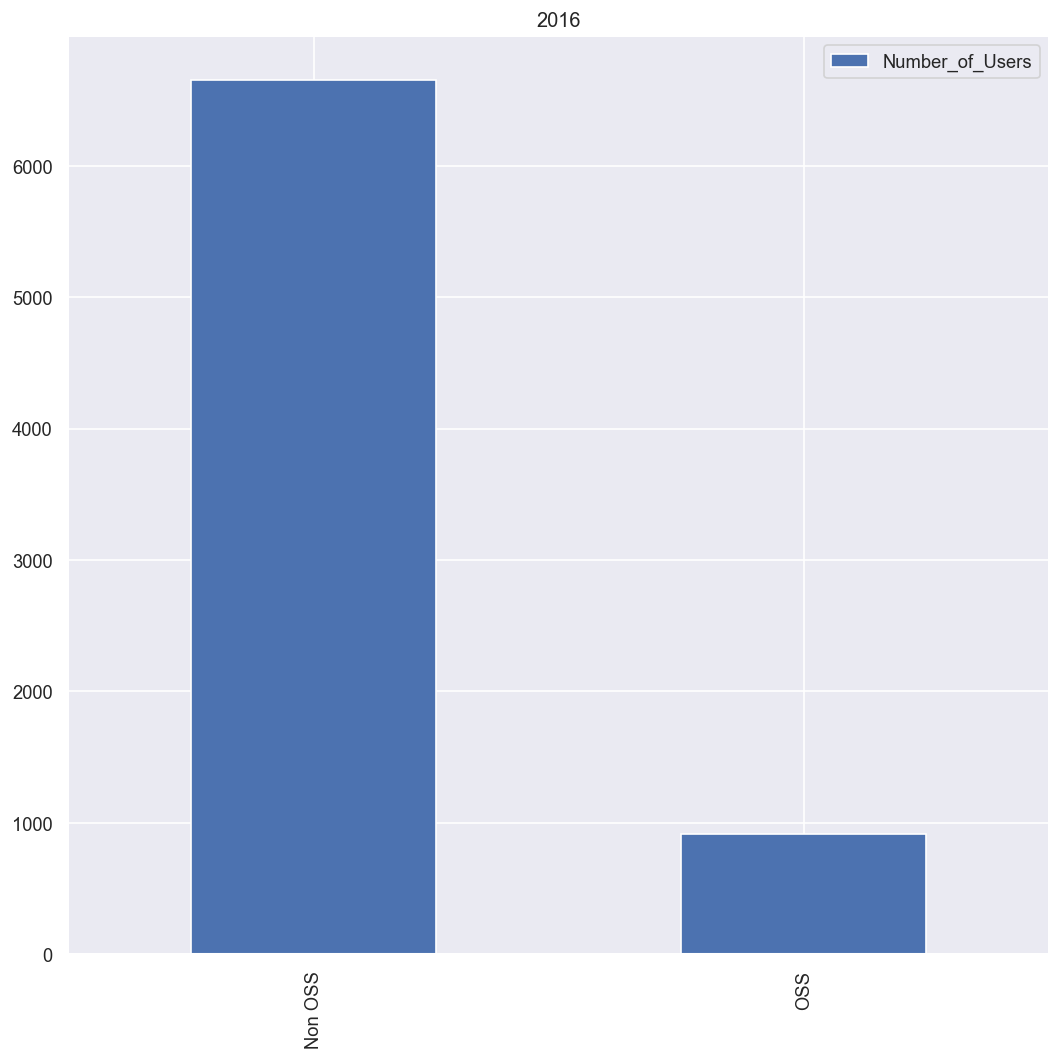

In [713]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
Data_OS[Data_OS.Mobile==0].groupby(by='Open_Source').agg({'Number_of_Users':'sum'}).plot(kind='bar',y='Number_of_Users',ax=ax)
ax.set_title('2016')
ax.set_xlabel('')
f.tight_layout()
f.savefig(fname='img/2016/dist_noss_oss_2016_pc.png',format='png',dpi=150)
plt.show()

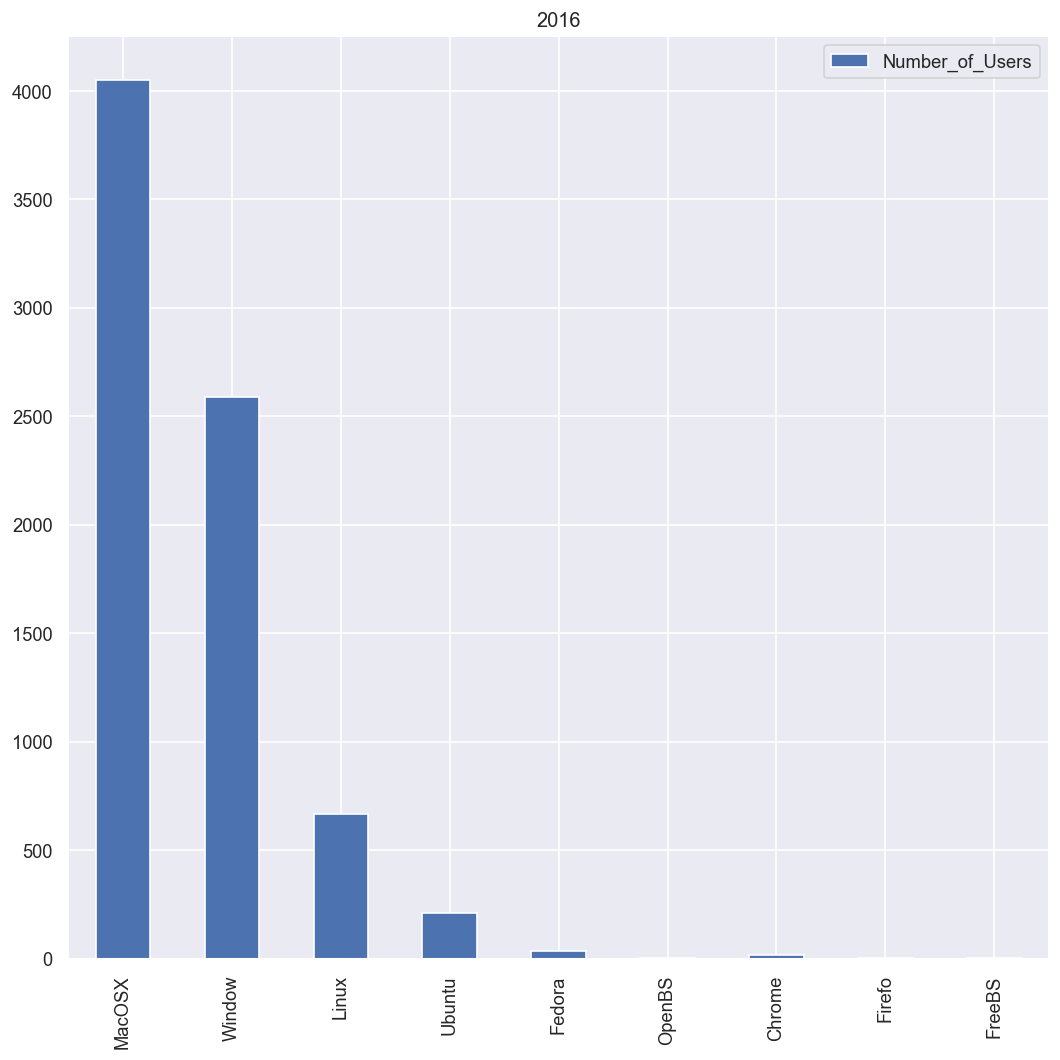

In [714]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
Data_OS[Data_OS.Mobile==0].set_index('OS').plot(kind='bar',y='Number_of_Users',ax=ax)
ax.set_title('2016')
ax.set_xlabel('')
f.tight_layout()
f.savefig(fname='img/2016/dist_os_2016_pc.png',format='png',dpi=150)
plt.show()

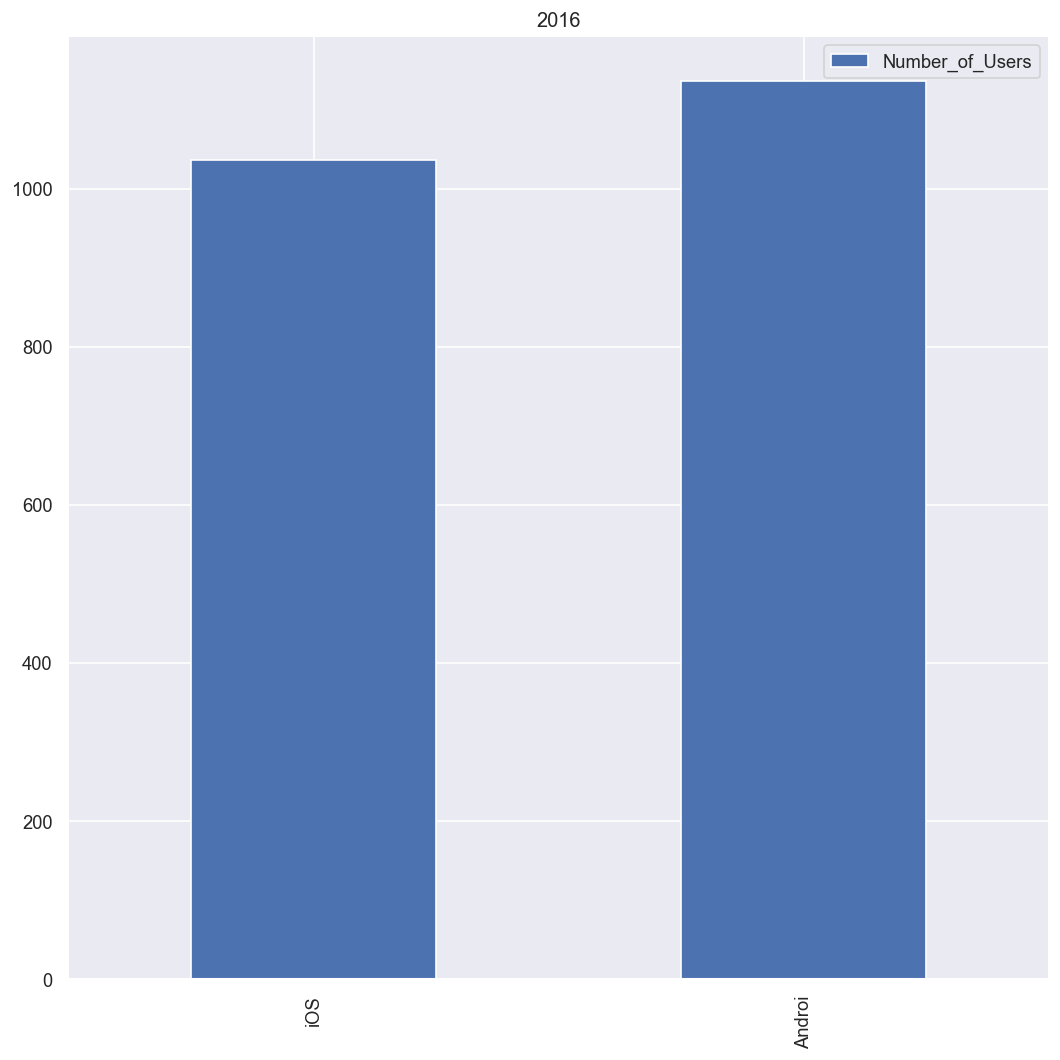

In [715]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
Data_OS[Data_OS.Mobile==1].set_index('OS').plot(kind='bar',y='Number_of_Users',ax=ax)
ax.set_title('2016')
ax.set_xlabel('')
f.tight_layout()
f.savefig(fname='img/2016/dist_os_2016_mobile.png',format='png',dpi=150)
plt.show()

# Now, let's take a look on other tools to extract the main used frameworks for front-end, back-end, ccs, et al. 

In [556]:
dummy = {}
for i in df[df.sections_other_tools != {}].sections_other_tools:
    for j in i:
        try:
            dummy[j] = dummy[j]+i[j]
        except:
            dummy[j] = i[j]

In [559]:
dummy.keys()

dict_keys(['mobile_desktop', 'state_management', 'front_end_frameworks', 'build_tools', 'testing', 'css', 'data_layer', 'backend_frameworks'])

In [573]:
fw_dicts = {}
for i in dummy.keys():
    dum = {}
    dum['framework'] = []
    dum['Count'] = []
    for j,k in Counter(dummy[i]).items():
        dum['framework'].append(j)
        dum['Count'].append(k)
    fw_dicts[i] = pd.DataFrame(dum)

In [581]:
for i in fw_dicts:
    fw_dicts[i] = fw_dicts[i].sort_values('Count',ascending=False)

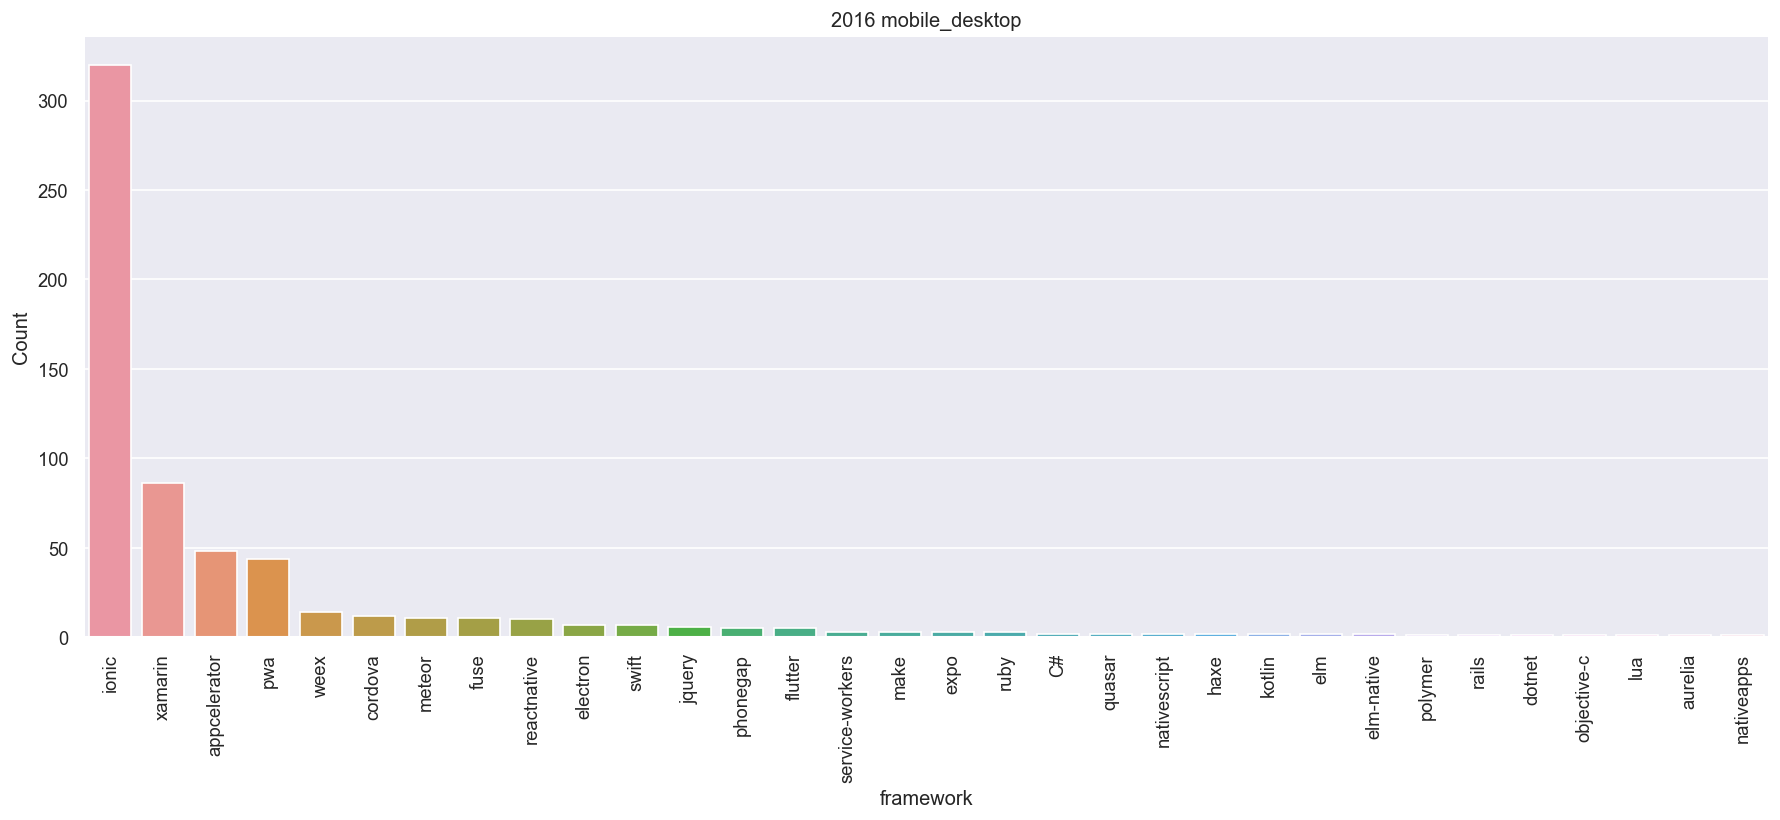

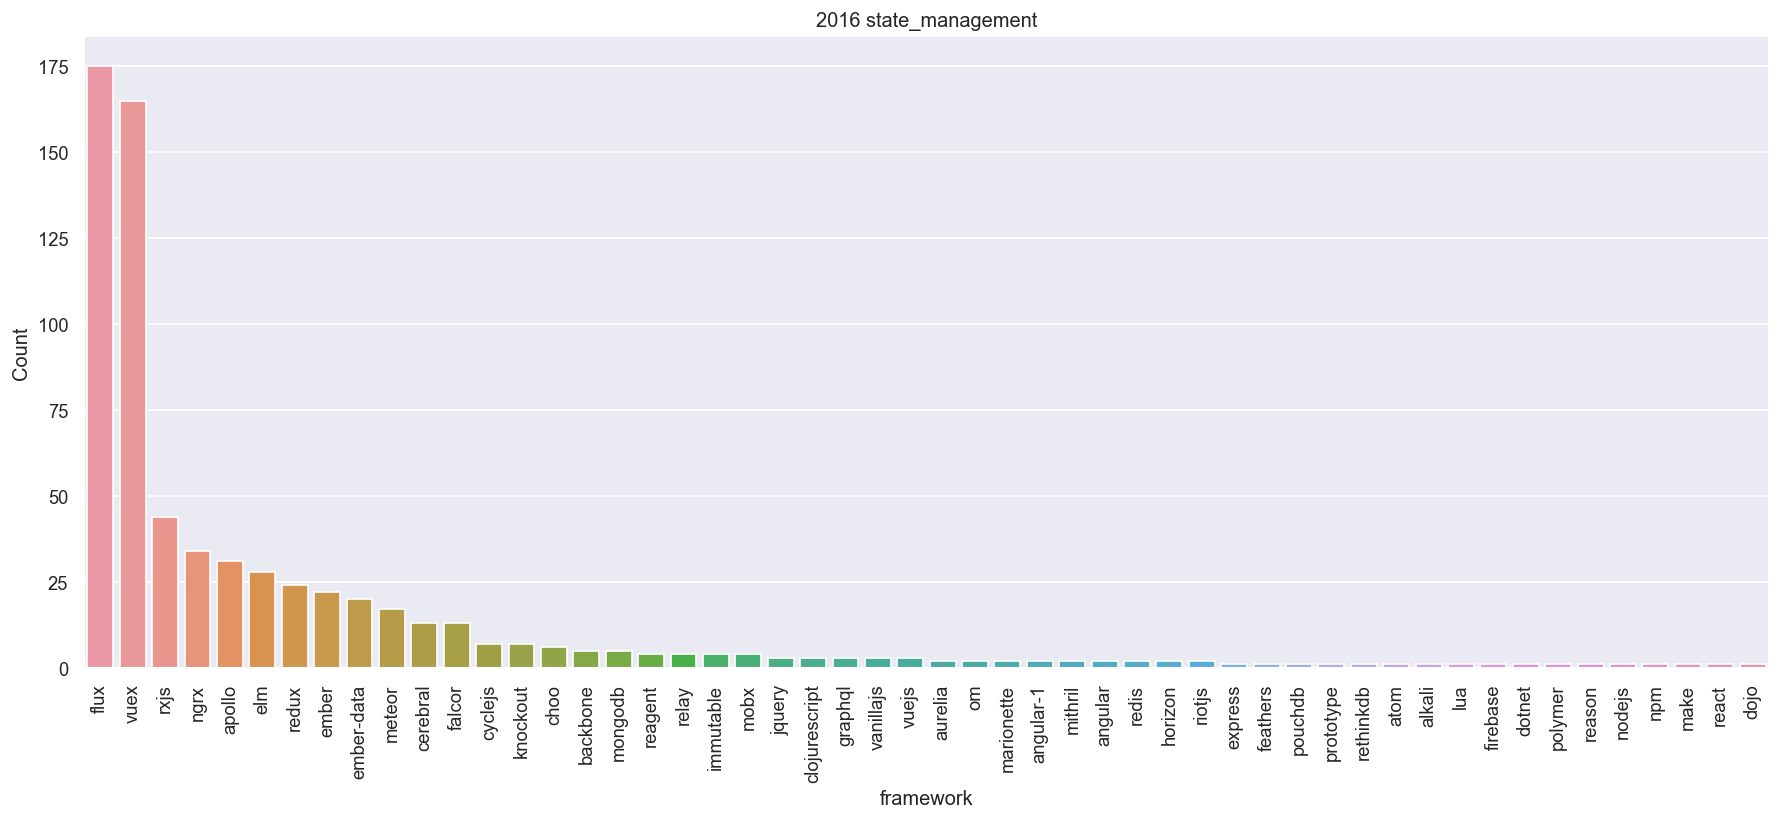

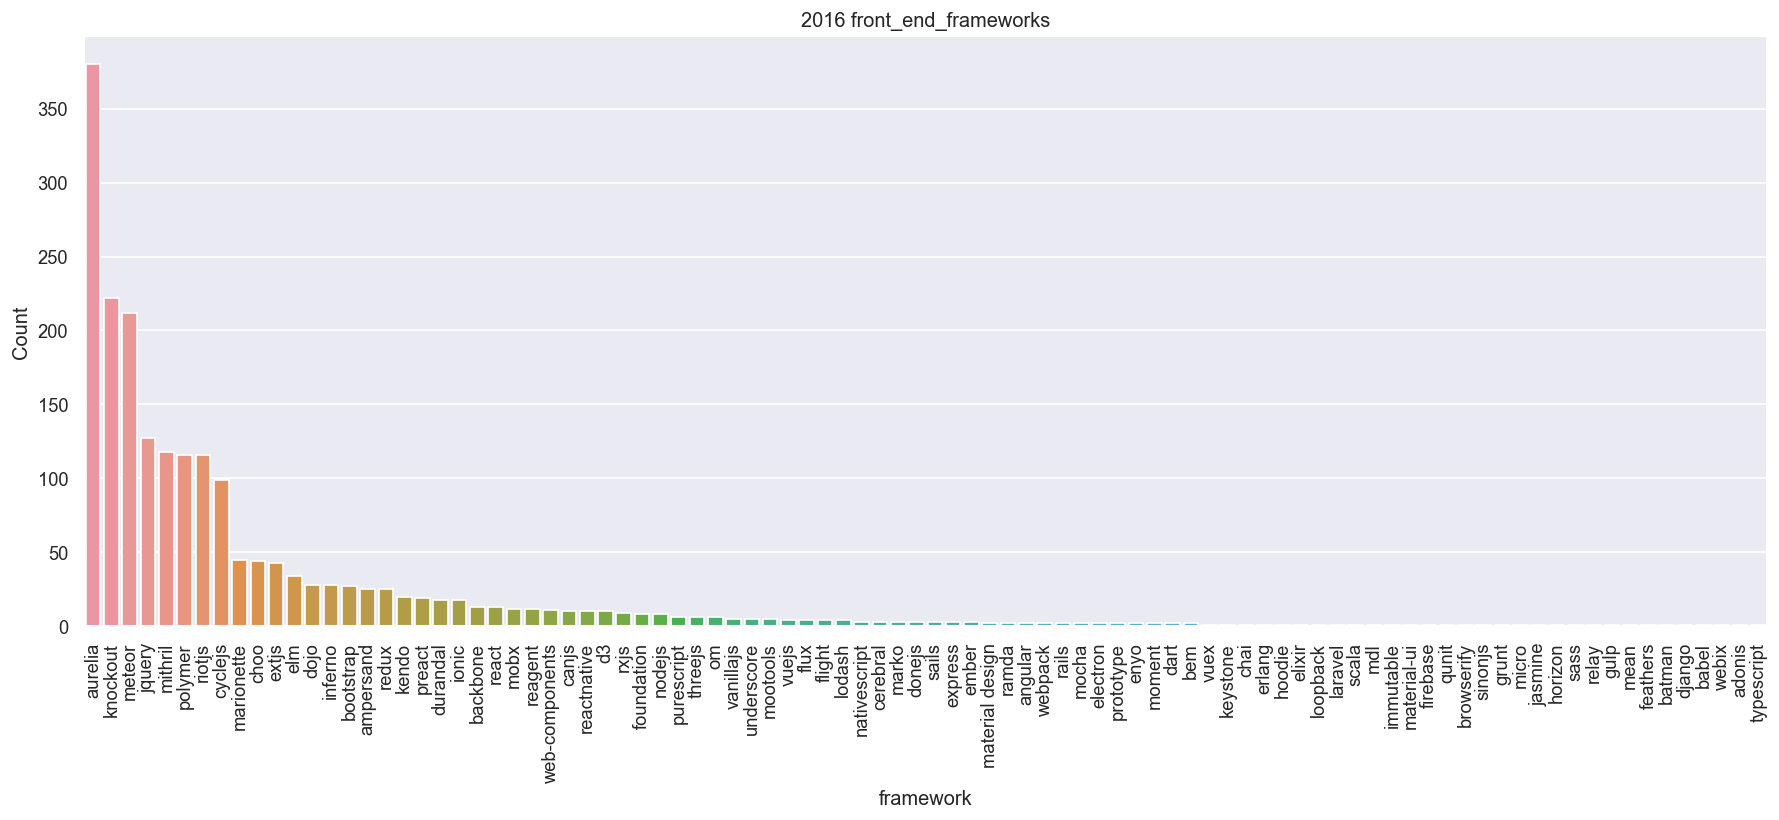

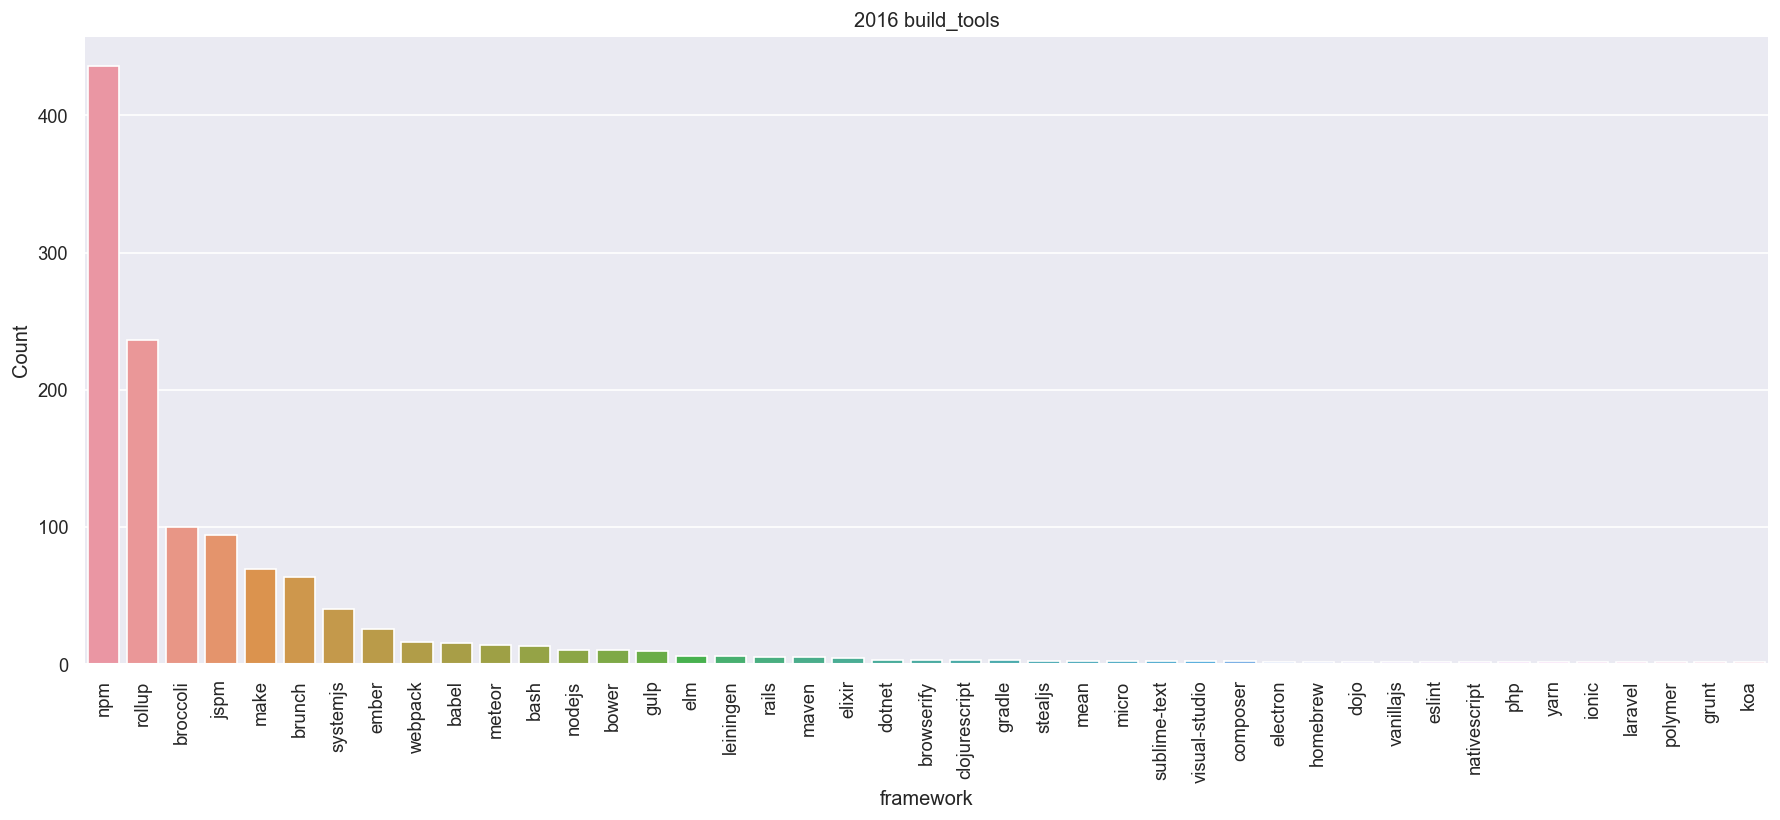

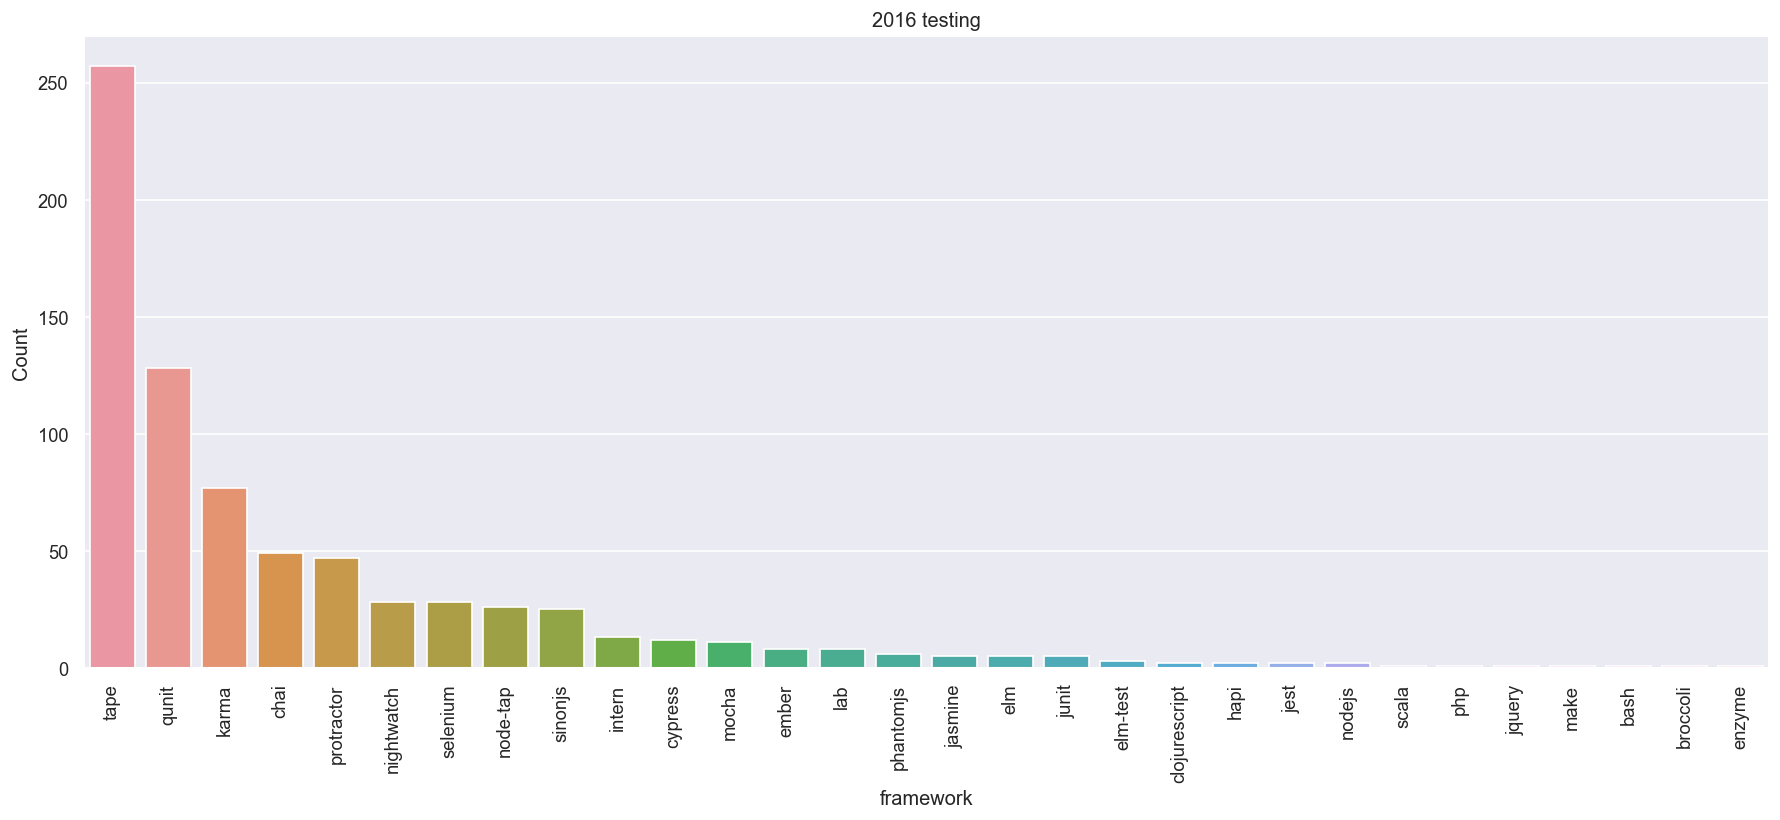

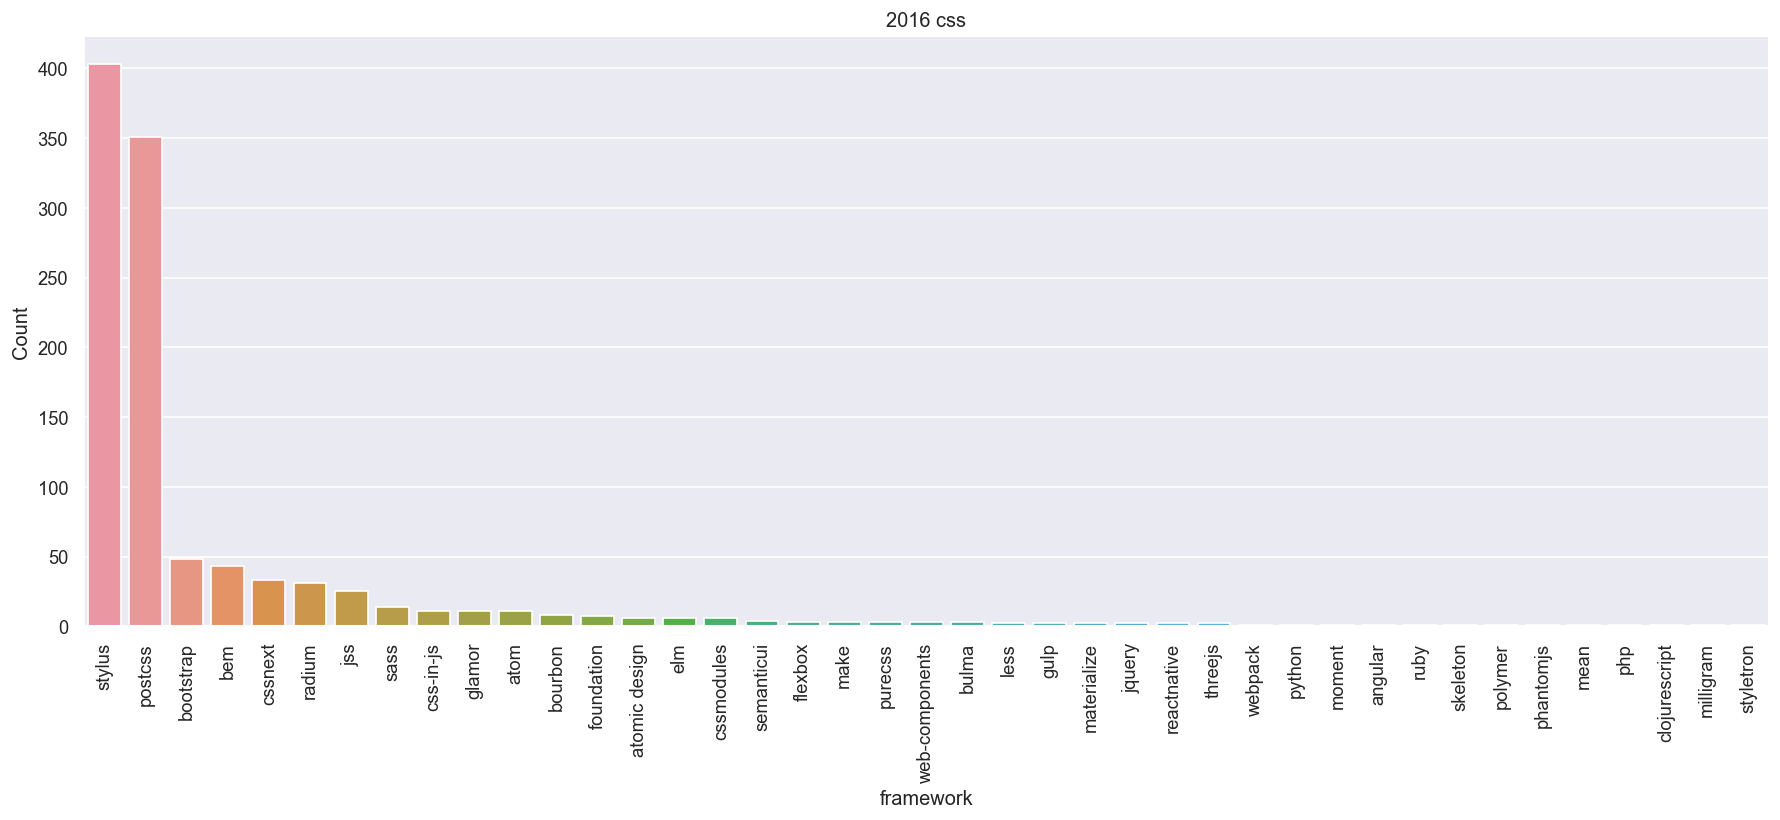

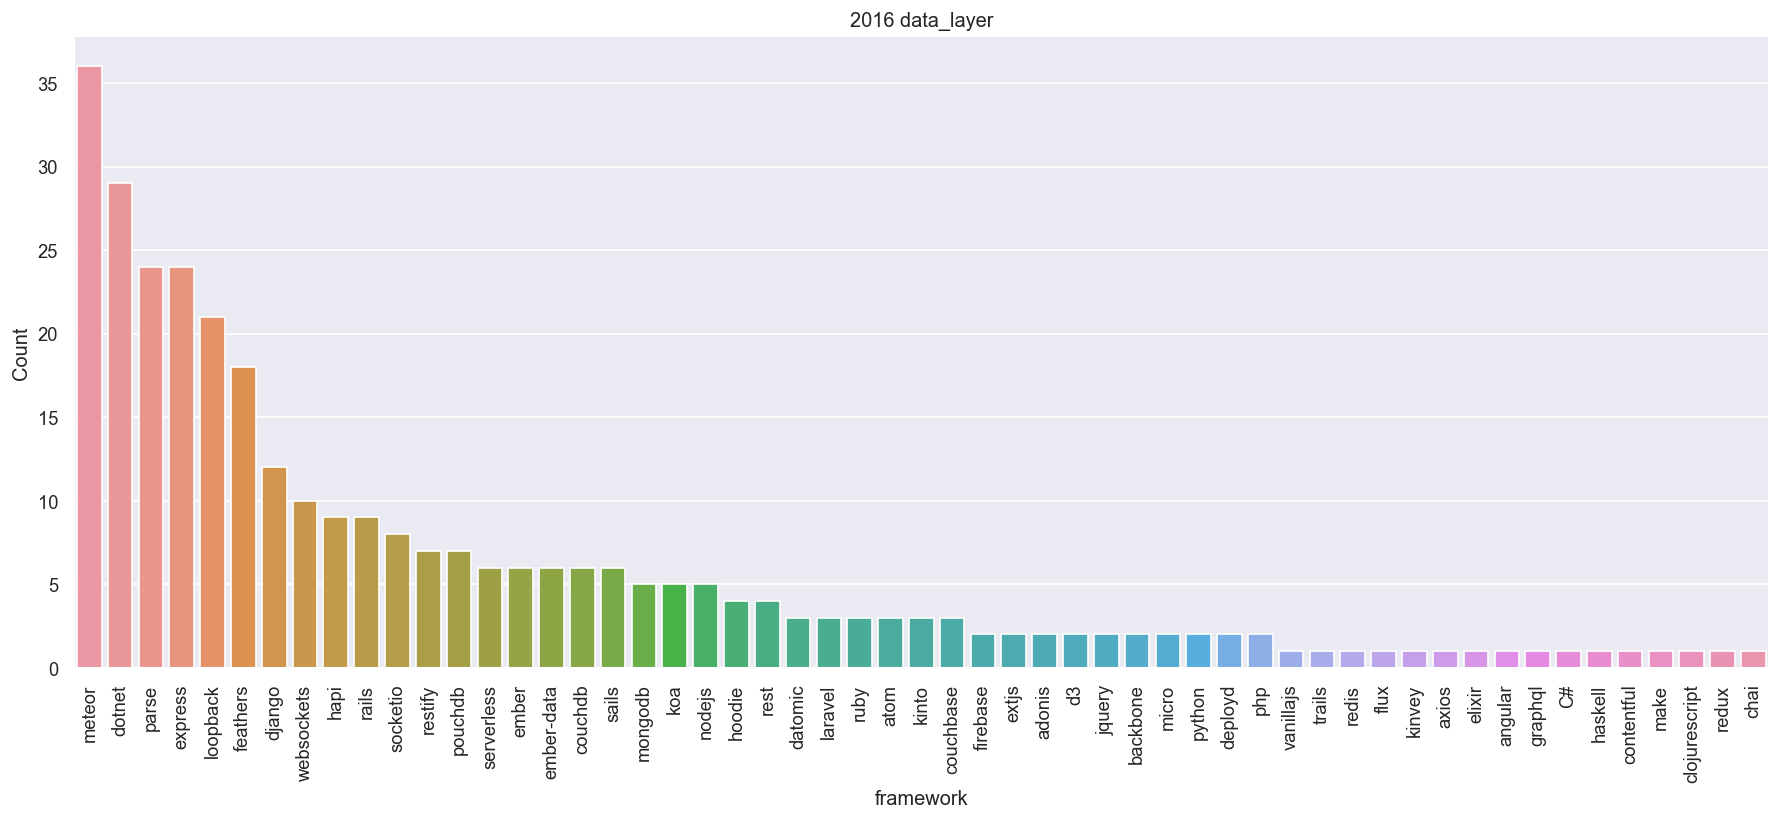

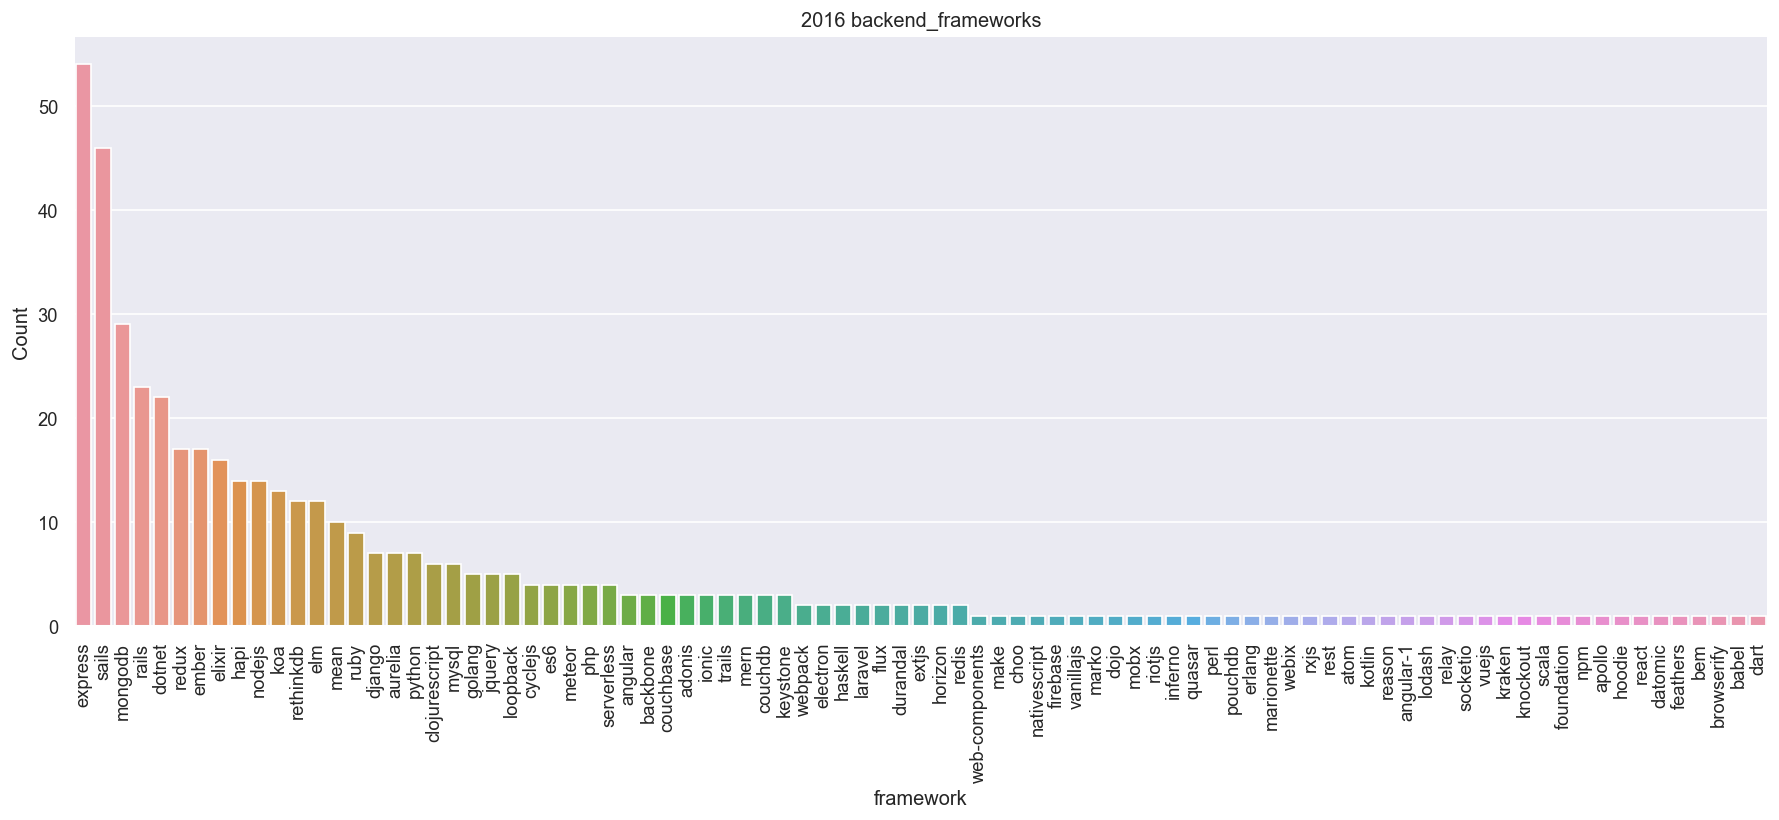

In [716]:
for i in fw_dicts.keys():
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='framework',y='Count',data=fw_dicts[i])
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_title('2016 '+i)
    f.tight_layout()
    f.savefig(fname='img/2016/'+i+'dist_2016.png',format='png',dpi=150)
    plt.show()

# For the next is where I do lost a lot of time trying a reasonable explanation and interpretation of the data. 

The next data is numerical data and even there are a lot of cases where there is no answer, how to interpretate this data?
Wihtout any a priori knowledge is almost impossible and, in the basis of this great bias, I sugest to interpretate these numbers as answer for a question similar to _**How many frameworks for ... did you use/know?**_

In [618]:
df.happiness.apply(lambda x:len(x)).unique()

array([9, 3, 7, 8, 6, 1, 5, 2, 4, 0])

In [620]:
dummy = {}
for i in df.happiness:
    for j in i:
        try:
            dummy[j].append(i[j])
        except:
            dummy[j] = [i[j]]

In [628]:
dum = {}
for i in dummy:
    dum[i] = {}
    dum[i]['Number_of'] = []
    dum[i]['Count'] = []
    for j,k in Counter(dummy[i]).items():
            dum[i]['Number_of'].append(j)
            dum[i]['Count'].append(k)
    dum[i] = pd.DataFrame(dum[i])

In [632]:
Count_Happines = dum

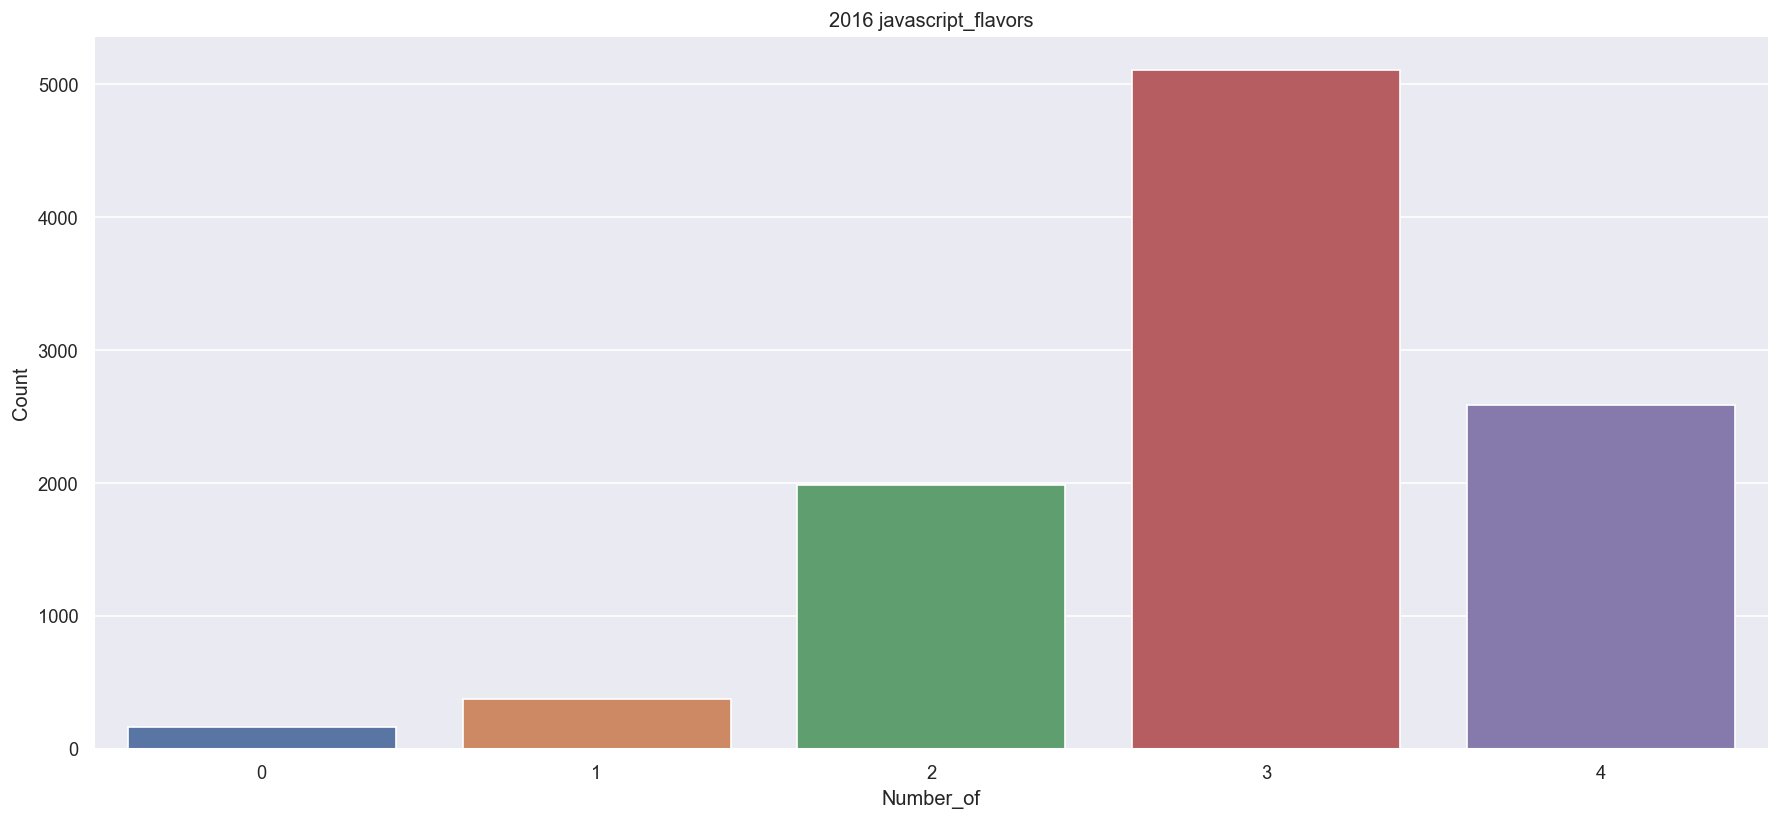

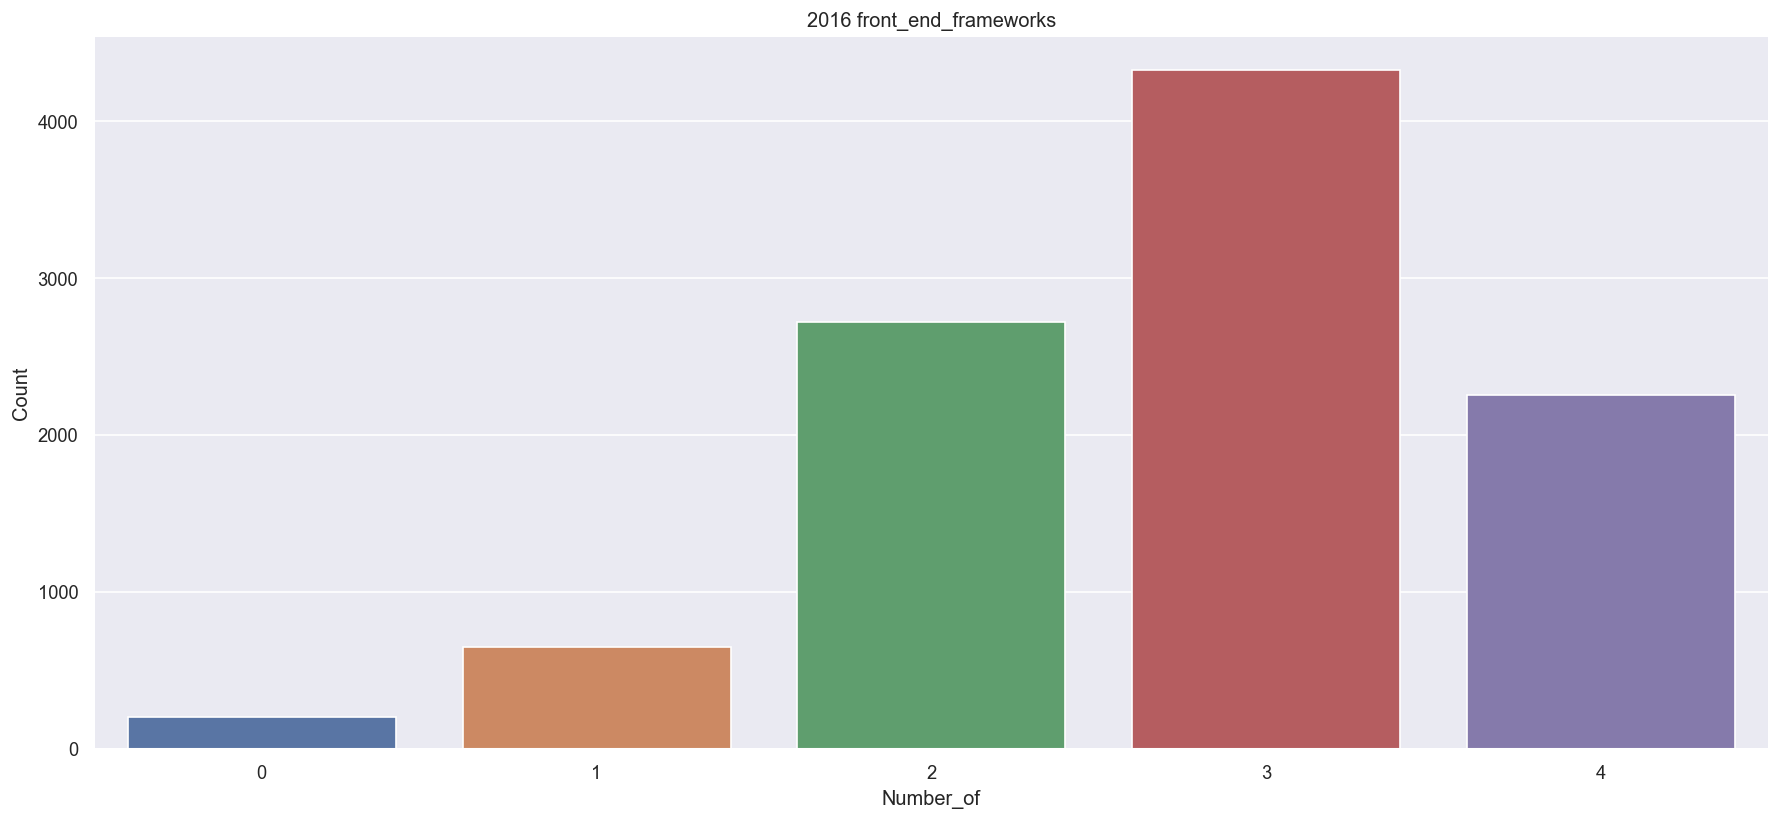

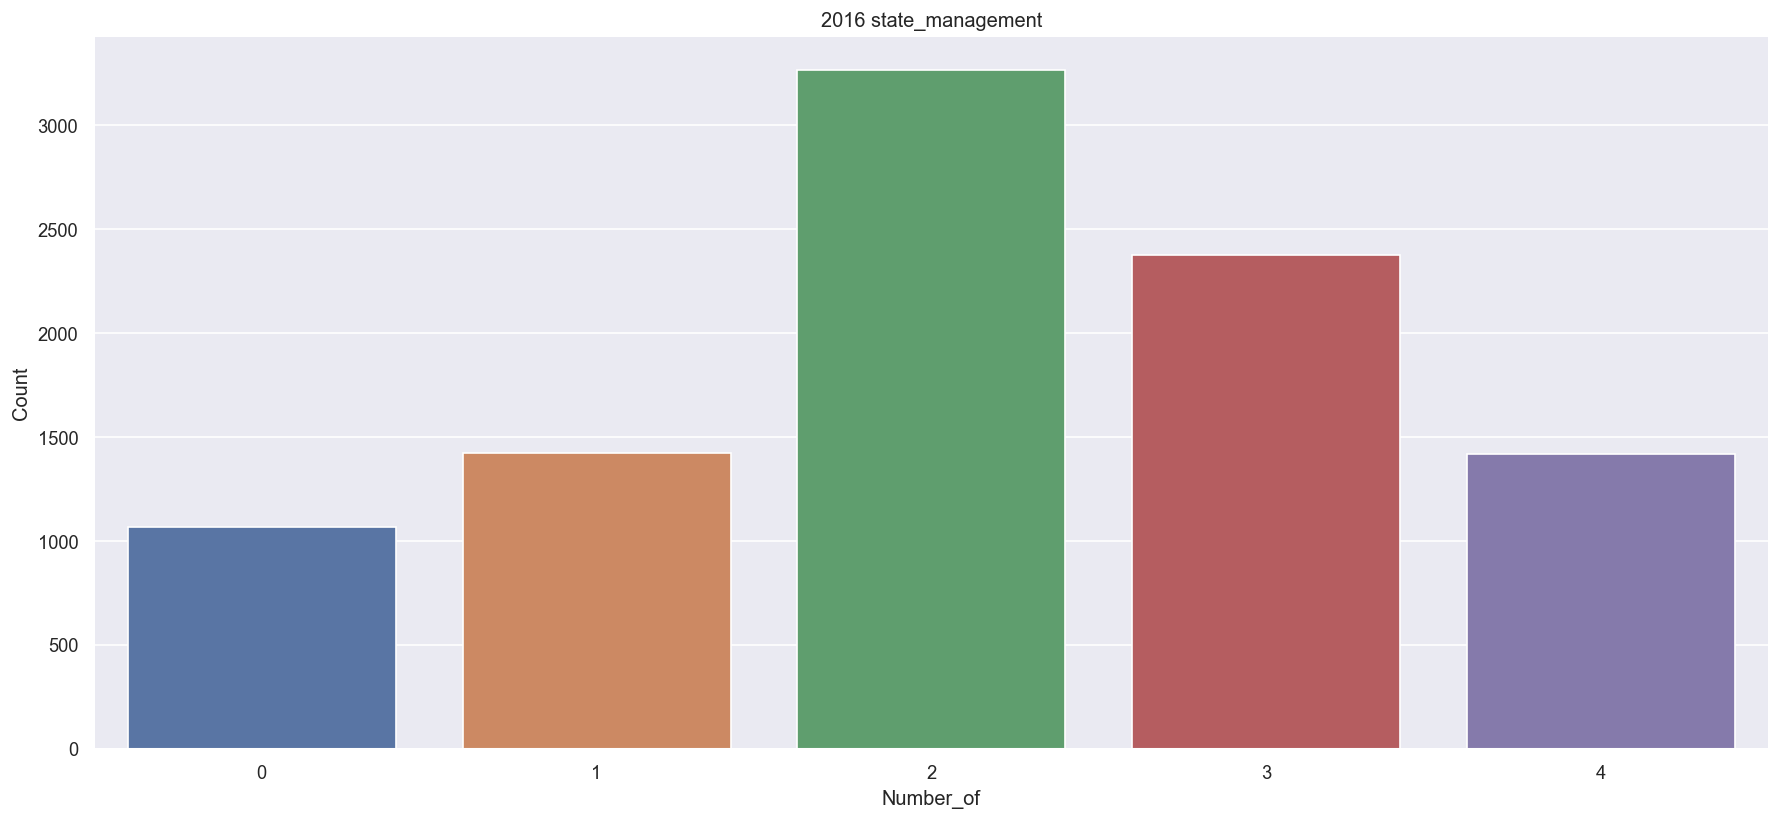

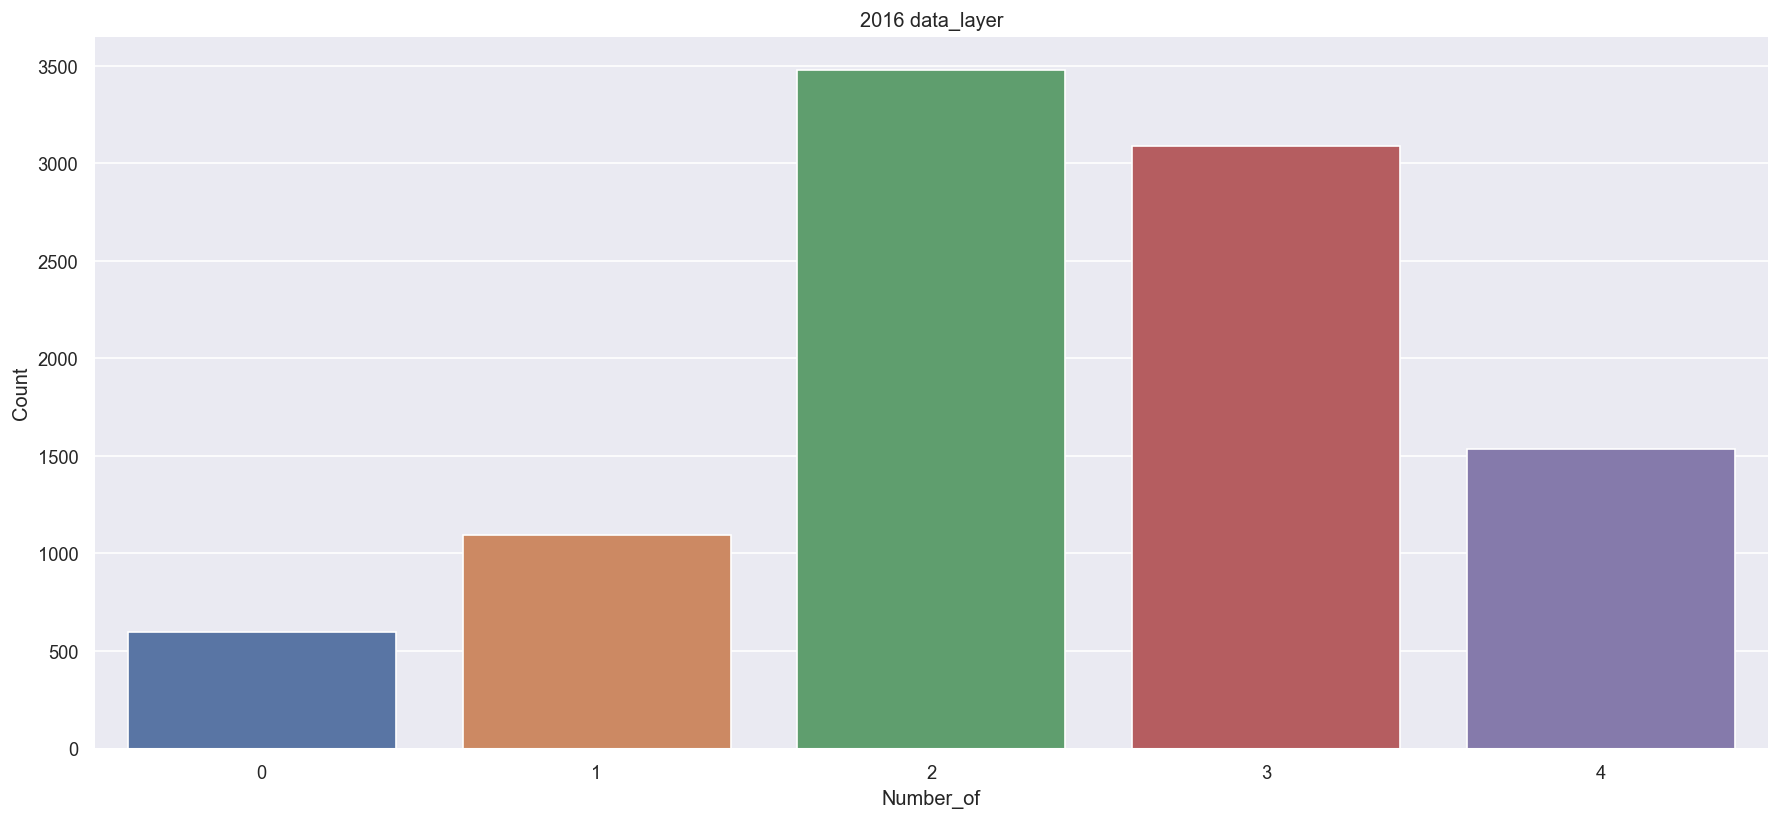

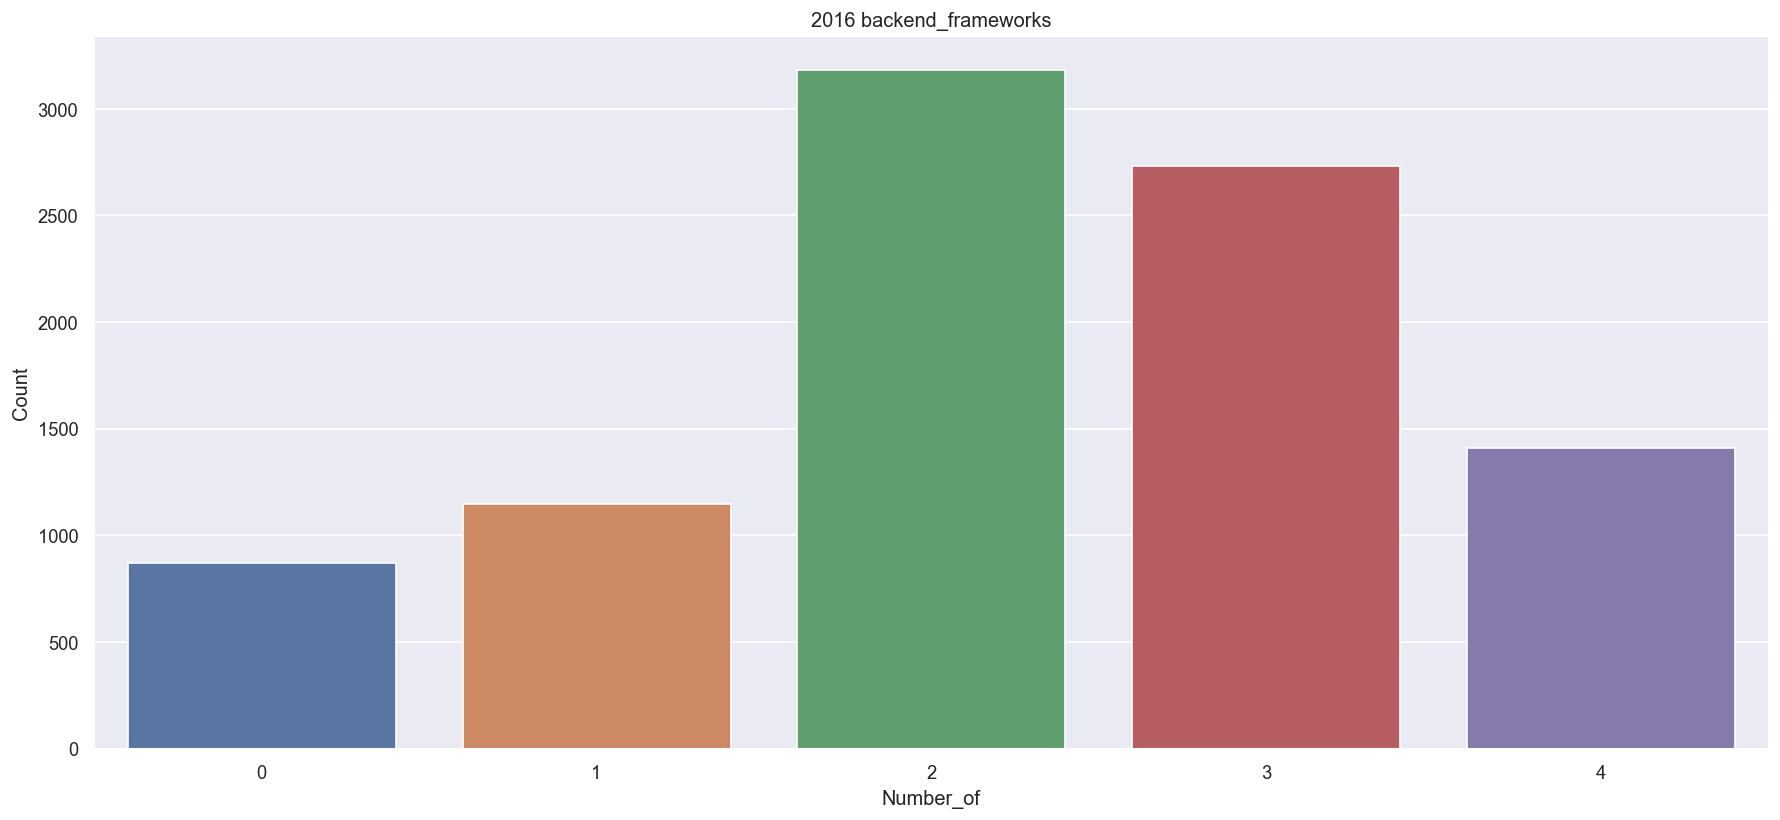

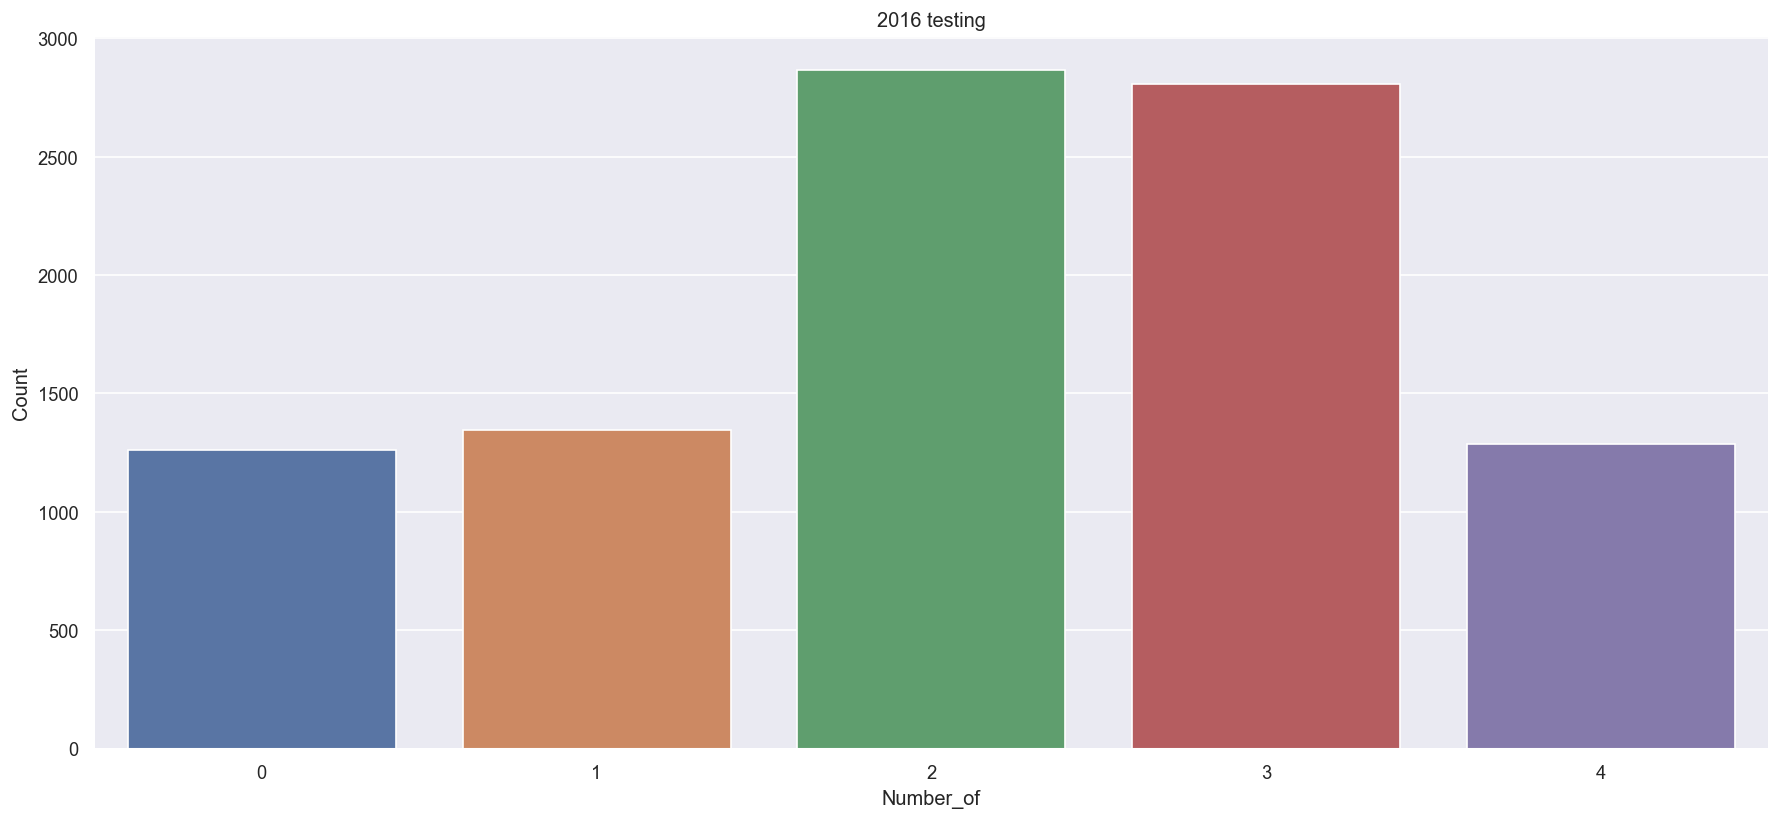

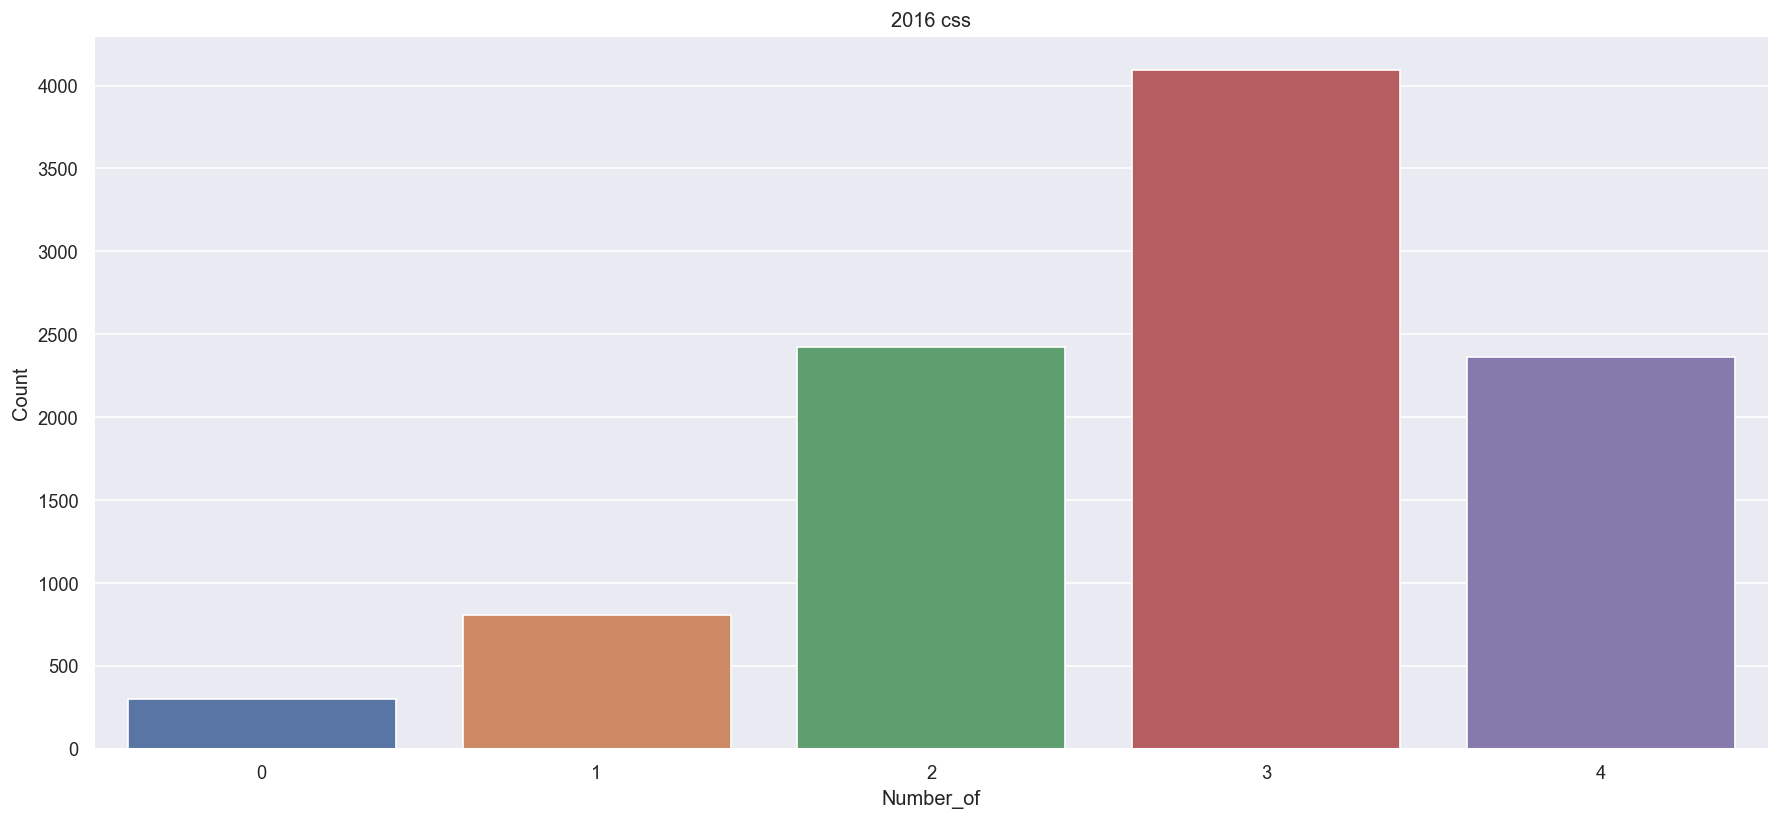

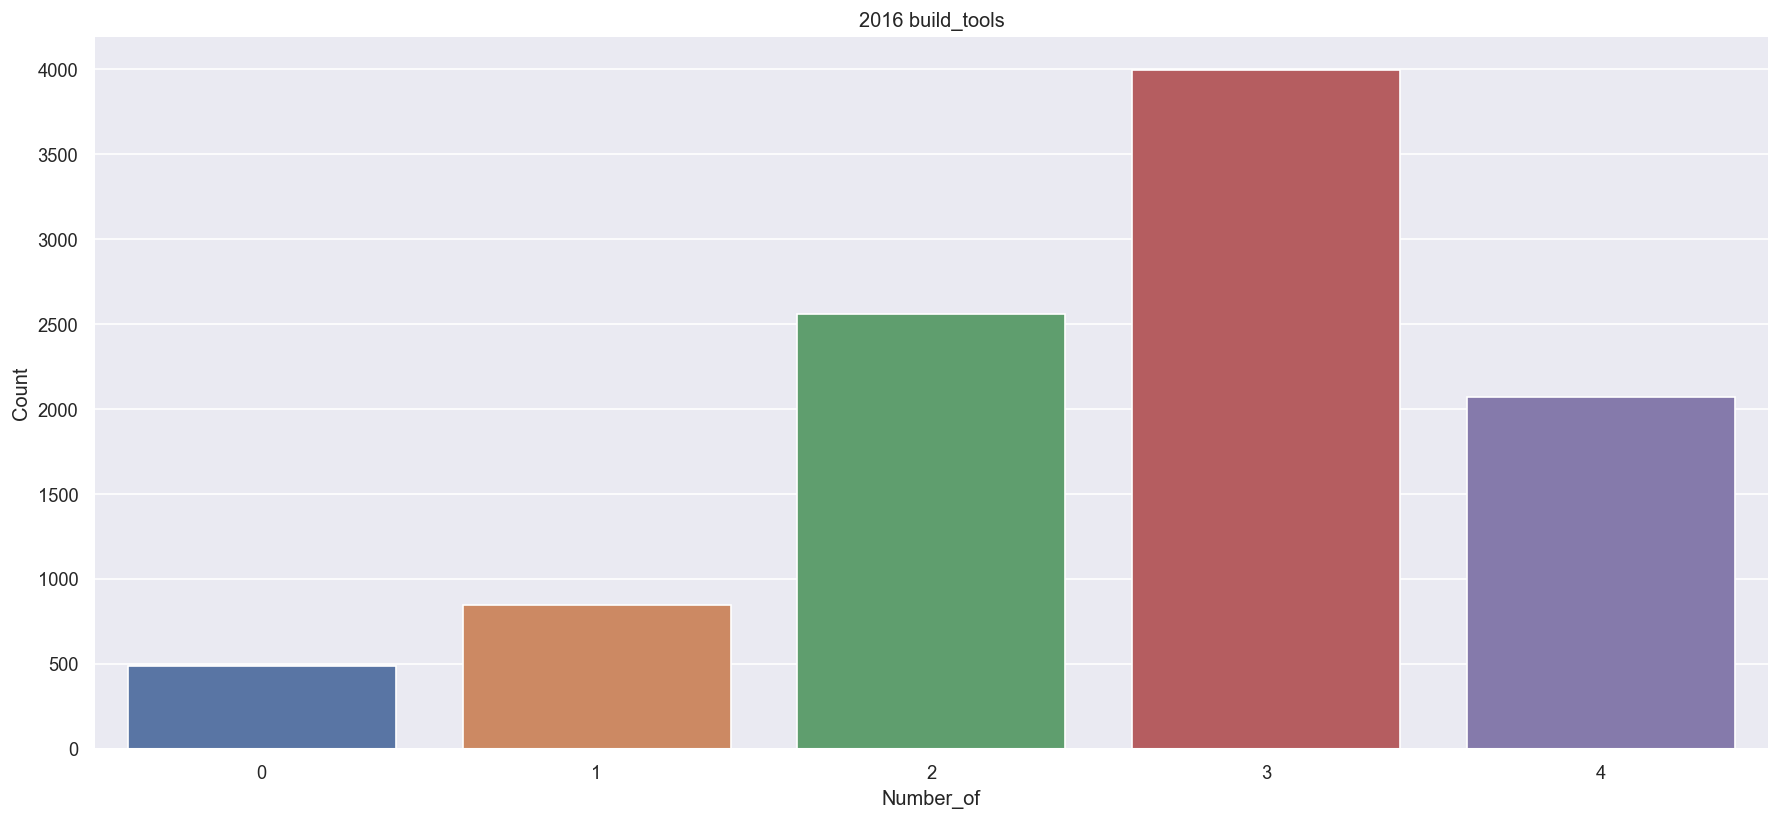

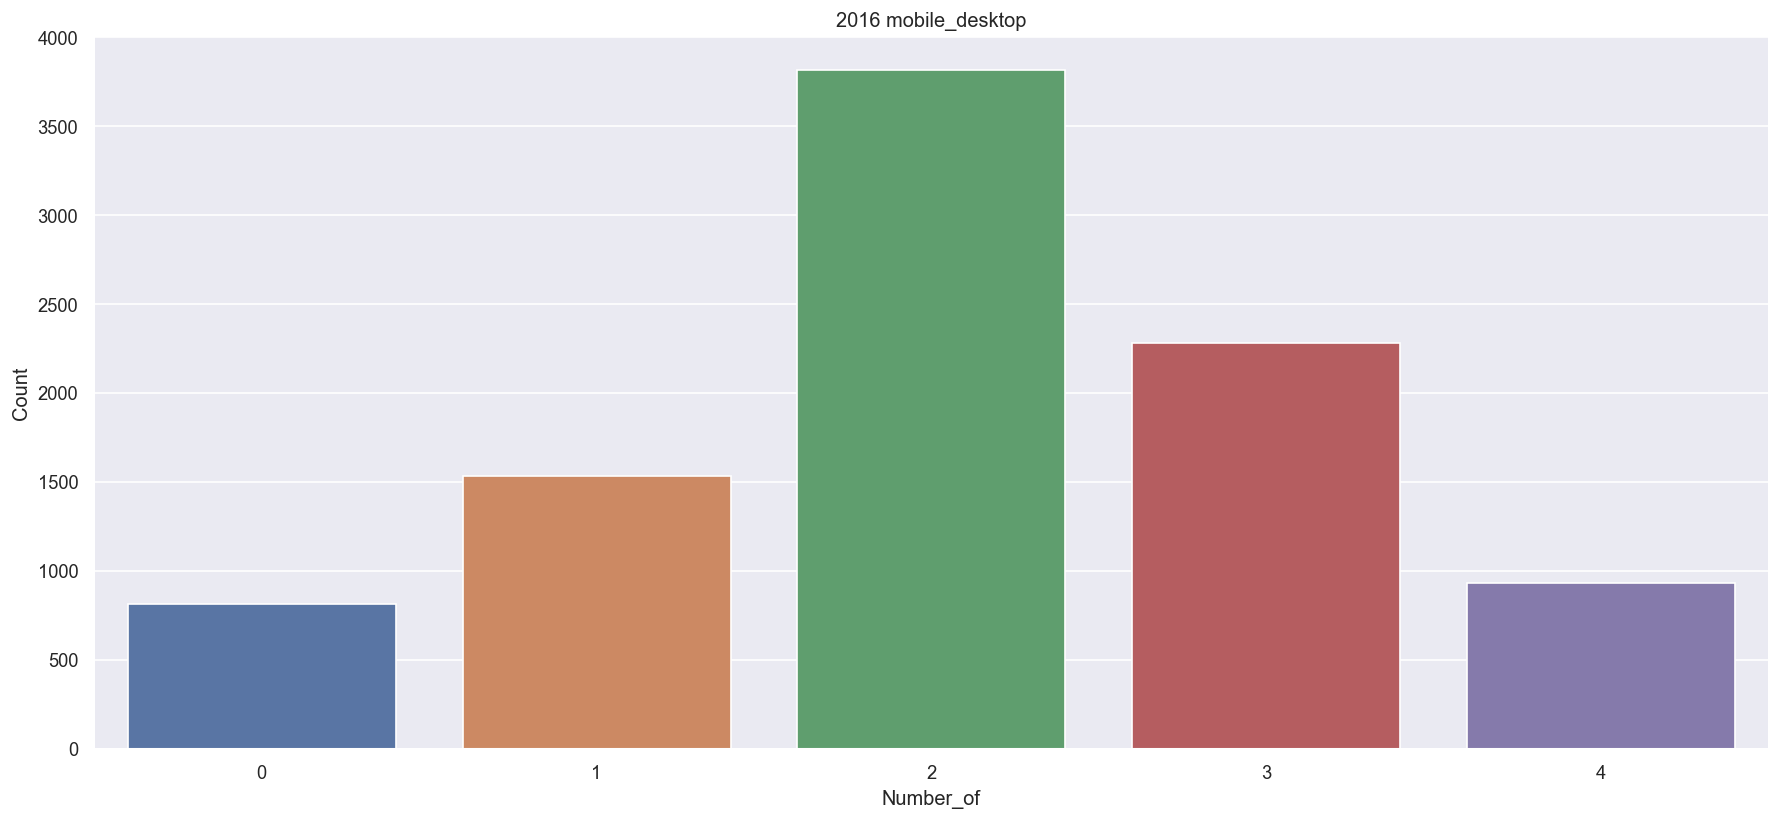

In [717]:
for i in Count_Happines.keys():
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='Number_of',y='Count',data=Count_Happines[i])
    ax.tick_params(axis = 'x', rotation = 0)
    ax.set_title('2016 '+i)
    f.tight_layout()
    f.savefig(fname='img/2016/'+i+'dist_2016.png',format='png',dpi=150)
    plt.show()

# Now let's check out the how is the data in Opinions,

In [635]:
df.opinions[0]

{'js_moving_in_right_direction': 2,
 'building_js_apps_overly_complex': 2,
 'js_over_used_online': 4,
 'enjoy_building_js_apps': 2,
 'would_like_js_to_be_main_lang': 2,
 'js_ecosystem_changing_to_fast': 3,
 'survey_too_long': 3}

In [636]:
dummy = {}
for i in df.opinions:
    for j in i:
        try:
            dummy[j].append(i[j])
        except:
            dummy[j] = [i[j]]

In [648]:
dum = {}
for i in dummy:
    dum[i] = {}
    dum[i]['Complexity/Affiniy'] = []
    dum[i]['Count'] = []
    for j,k in Counter(dummy[i]).items():
            dum[i]['Complexity/Affiniy'].append(j)
            dum[i]['Count'].append(k)
    dum[i] = pd.DataFrame(dum[i])

In [649]:
Opinions_dict_DF = dum

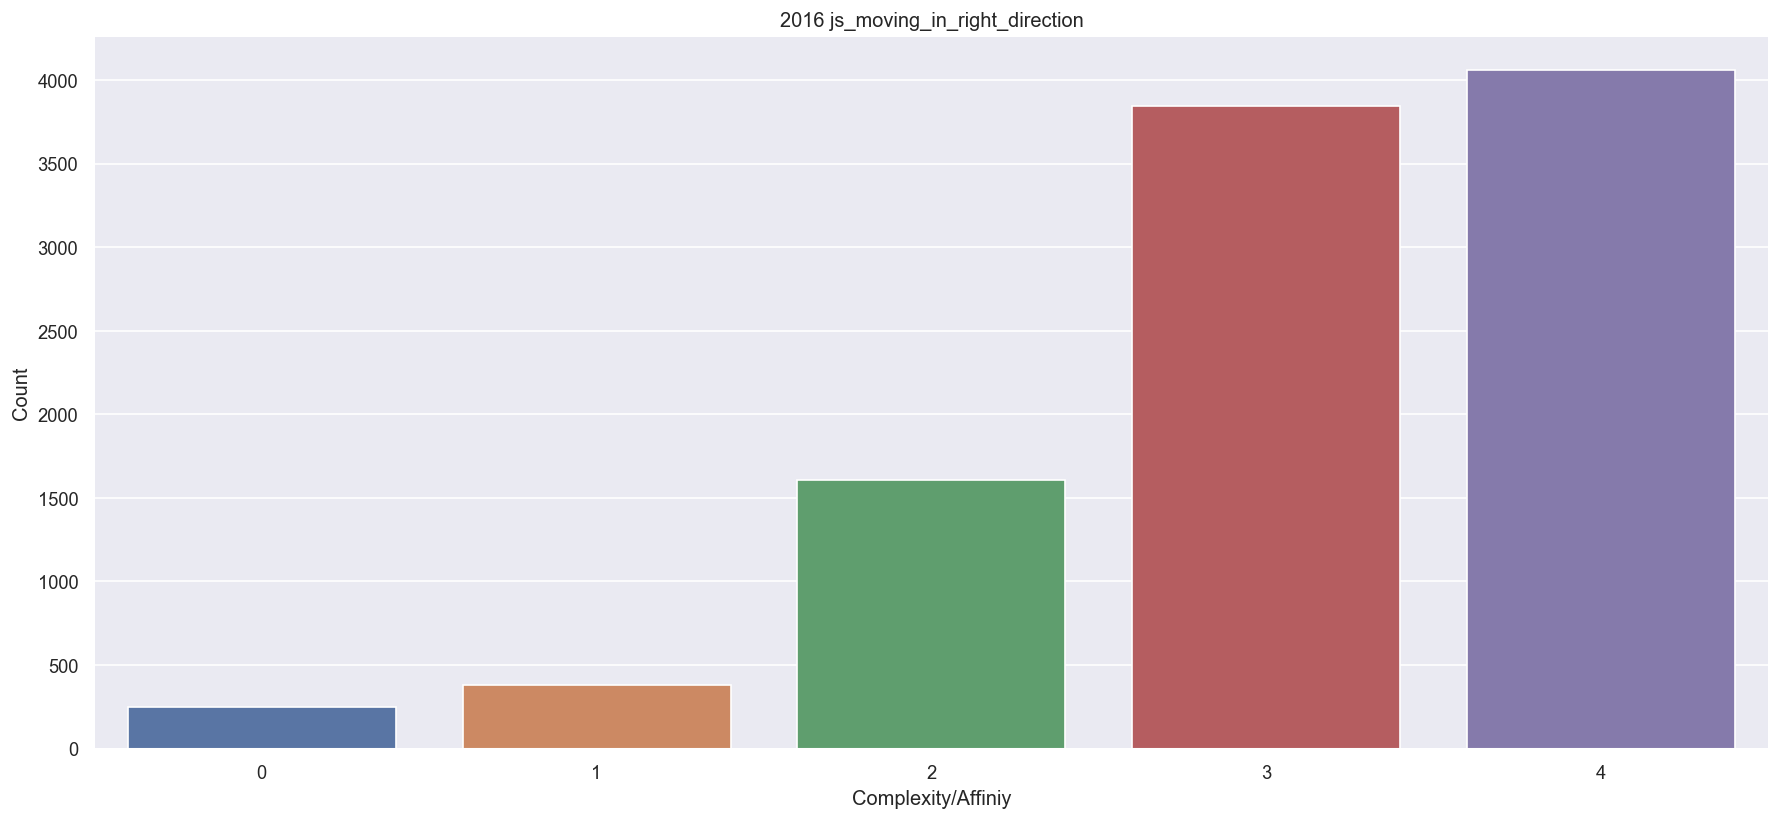

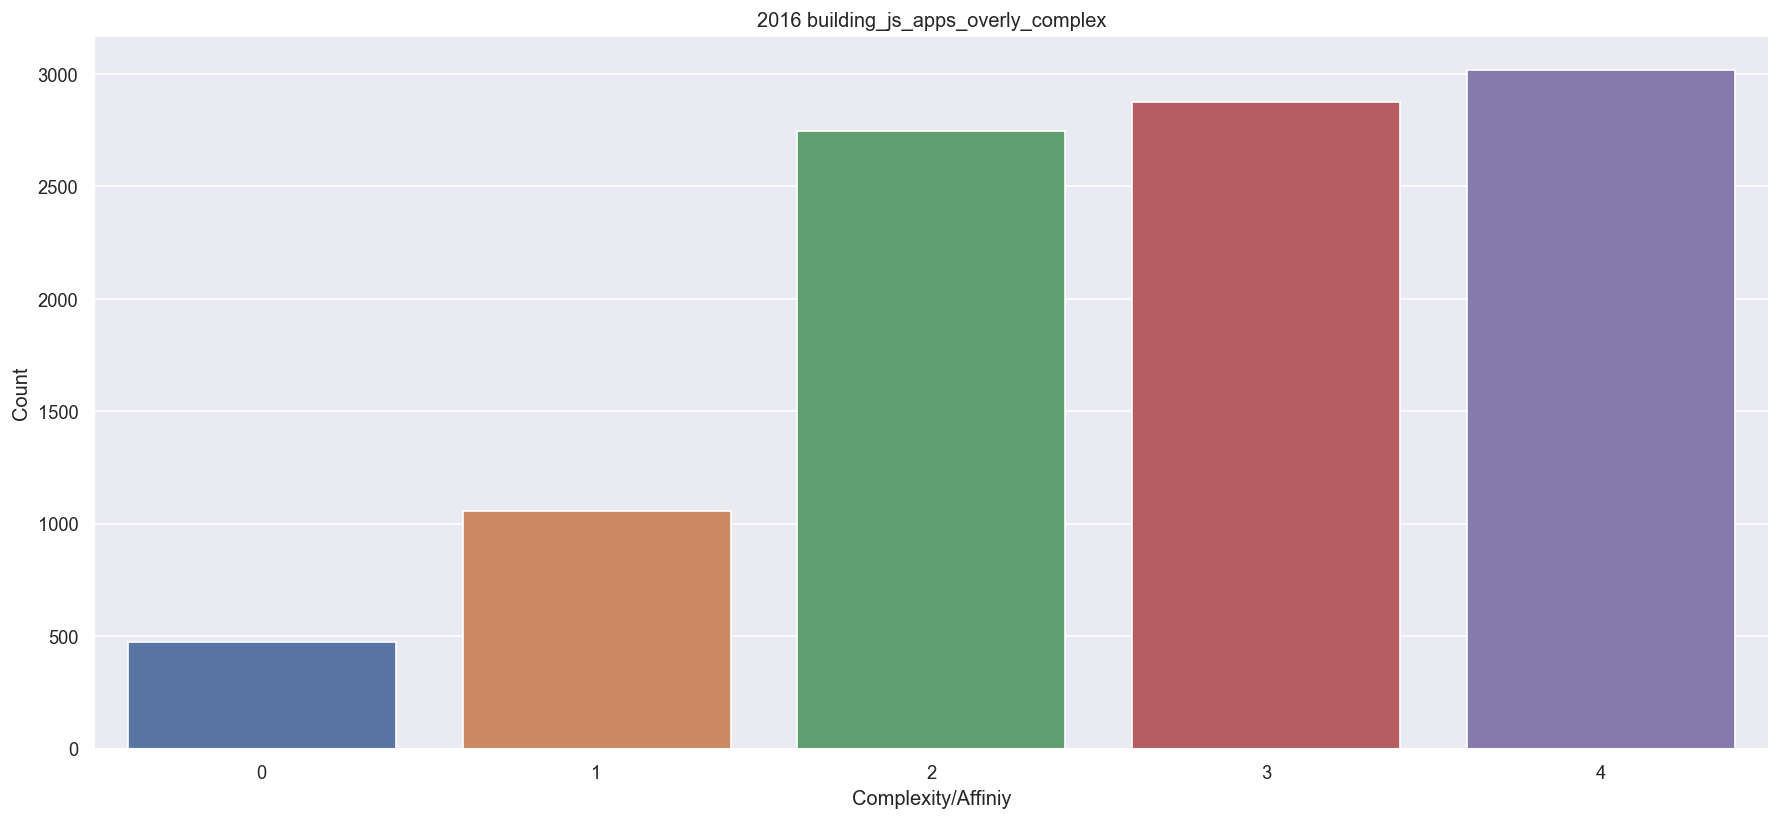

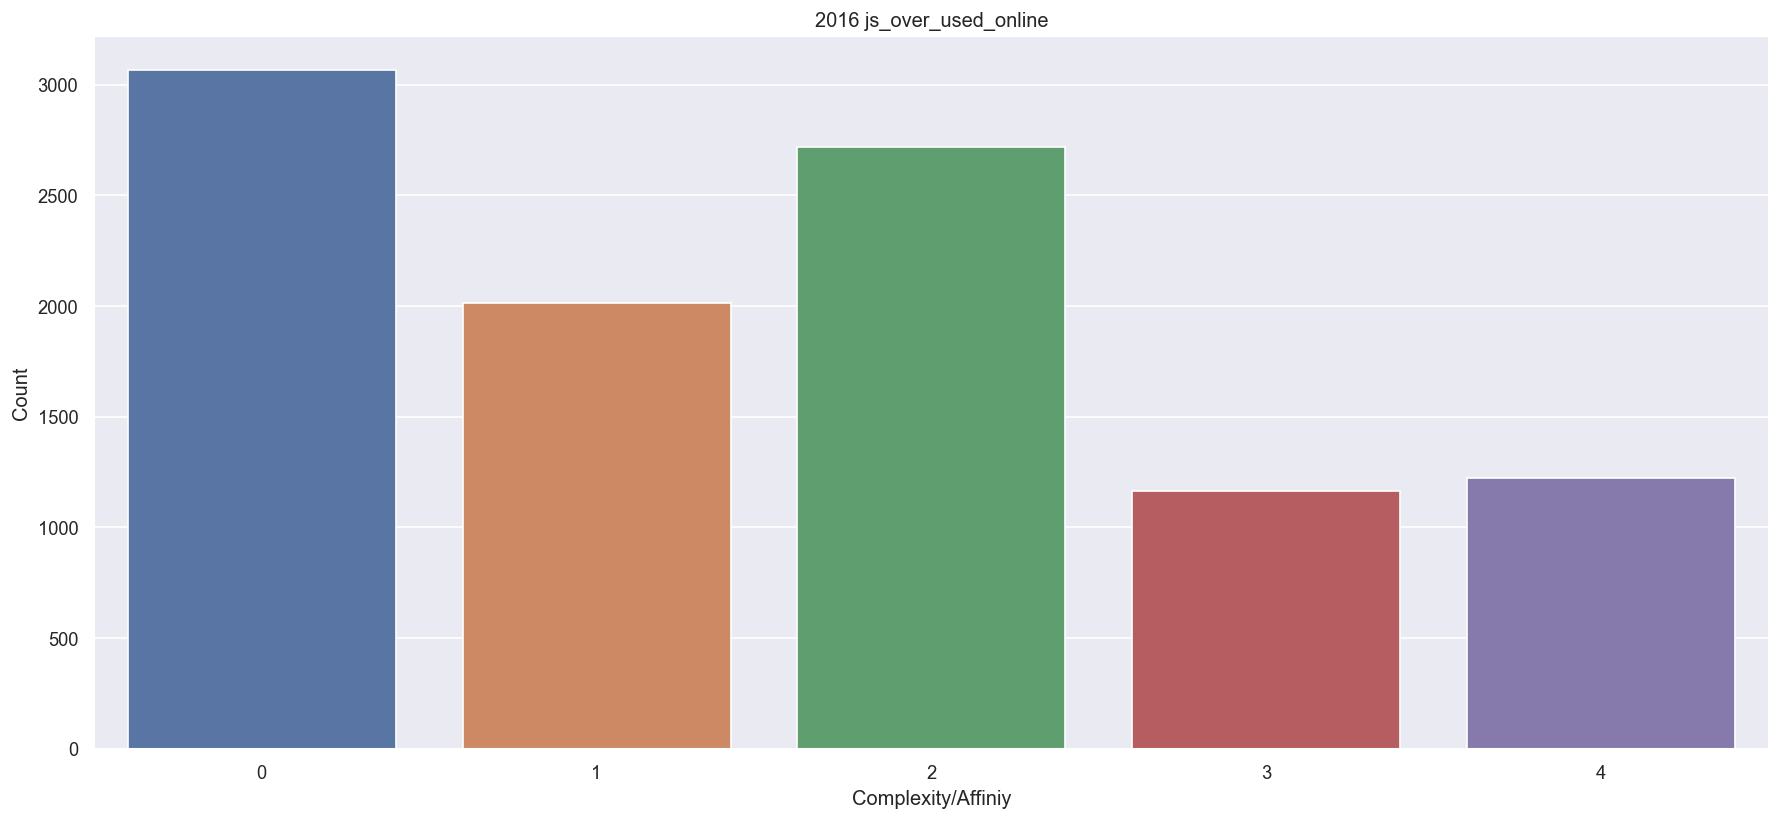

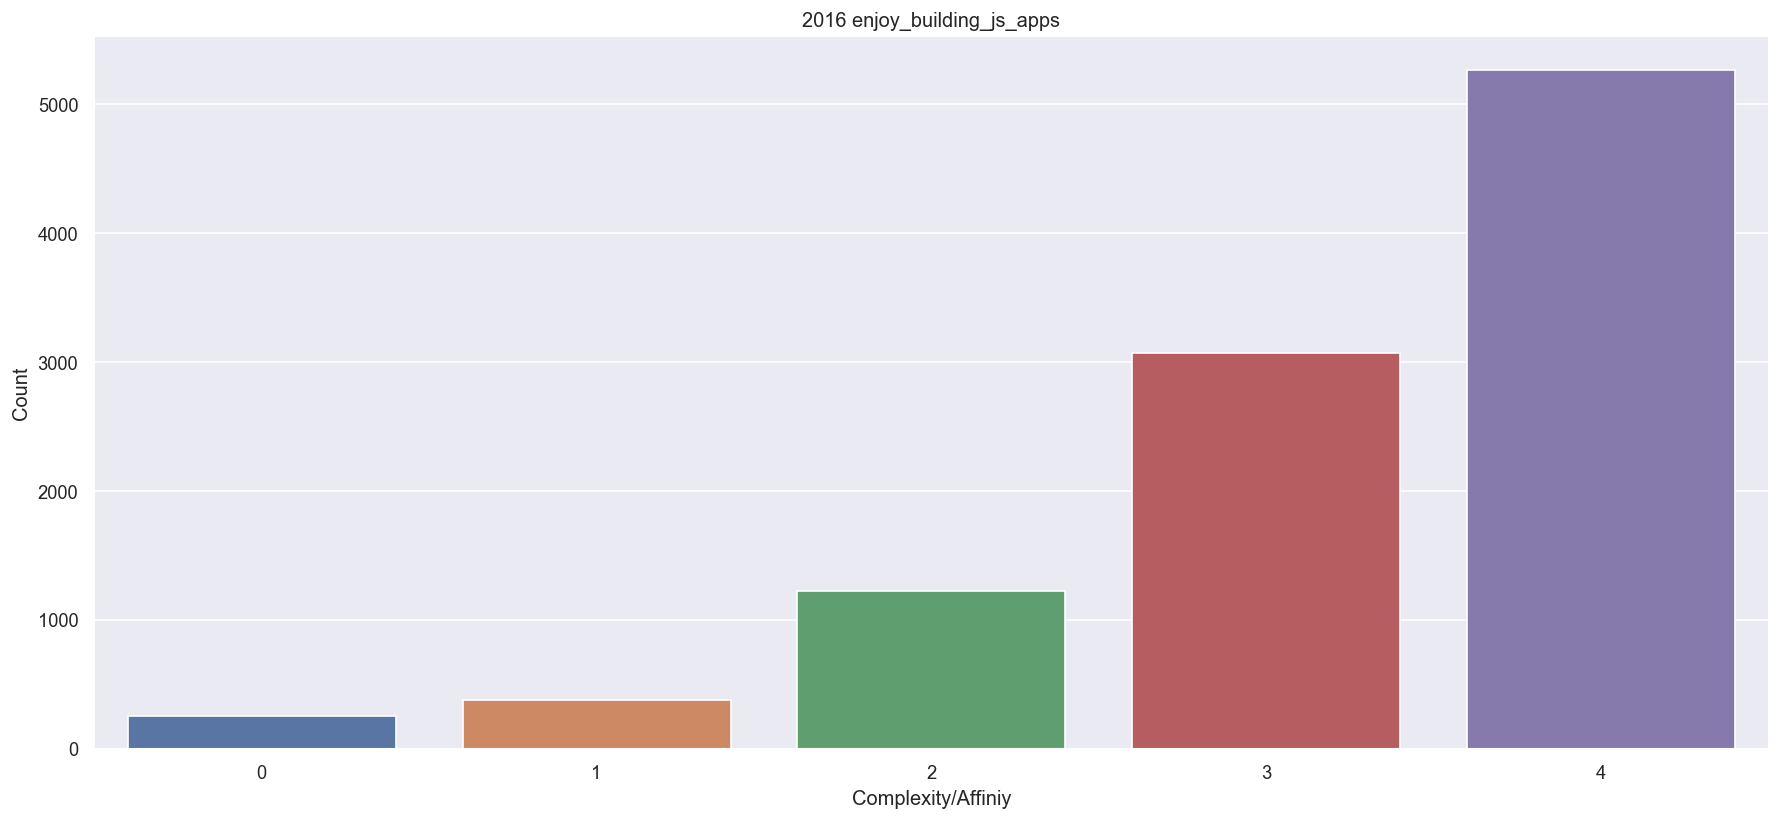

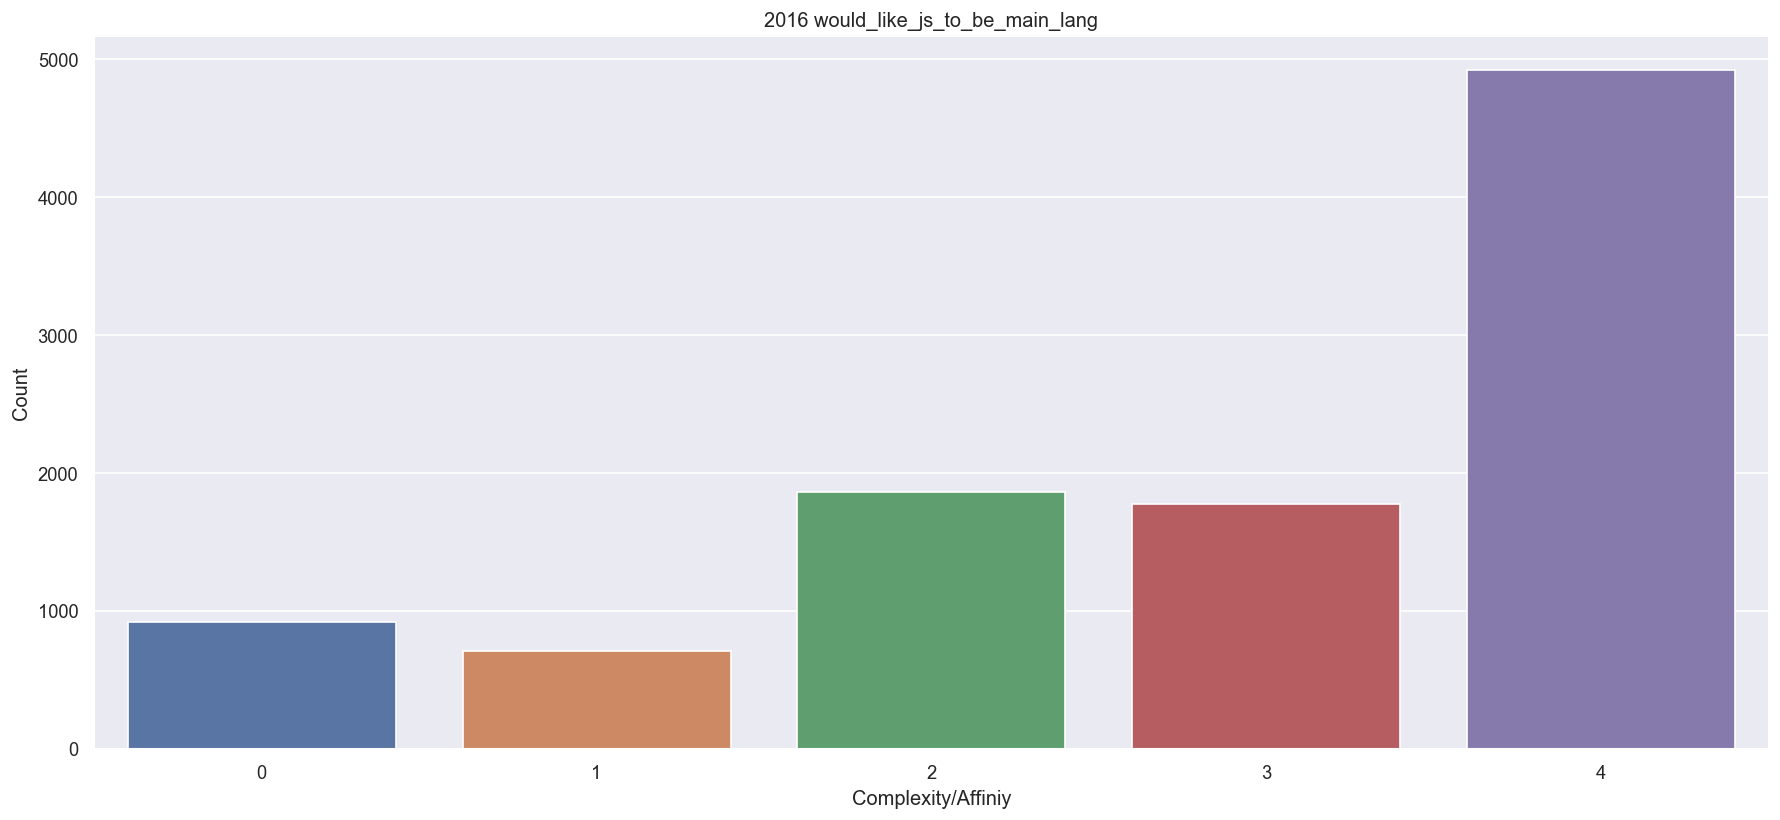

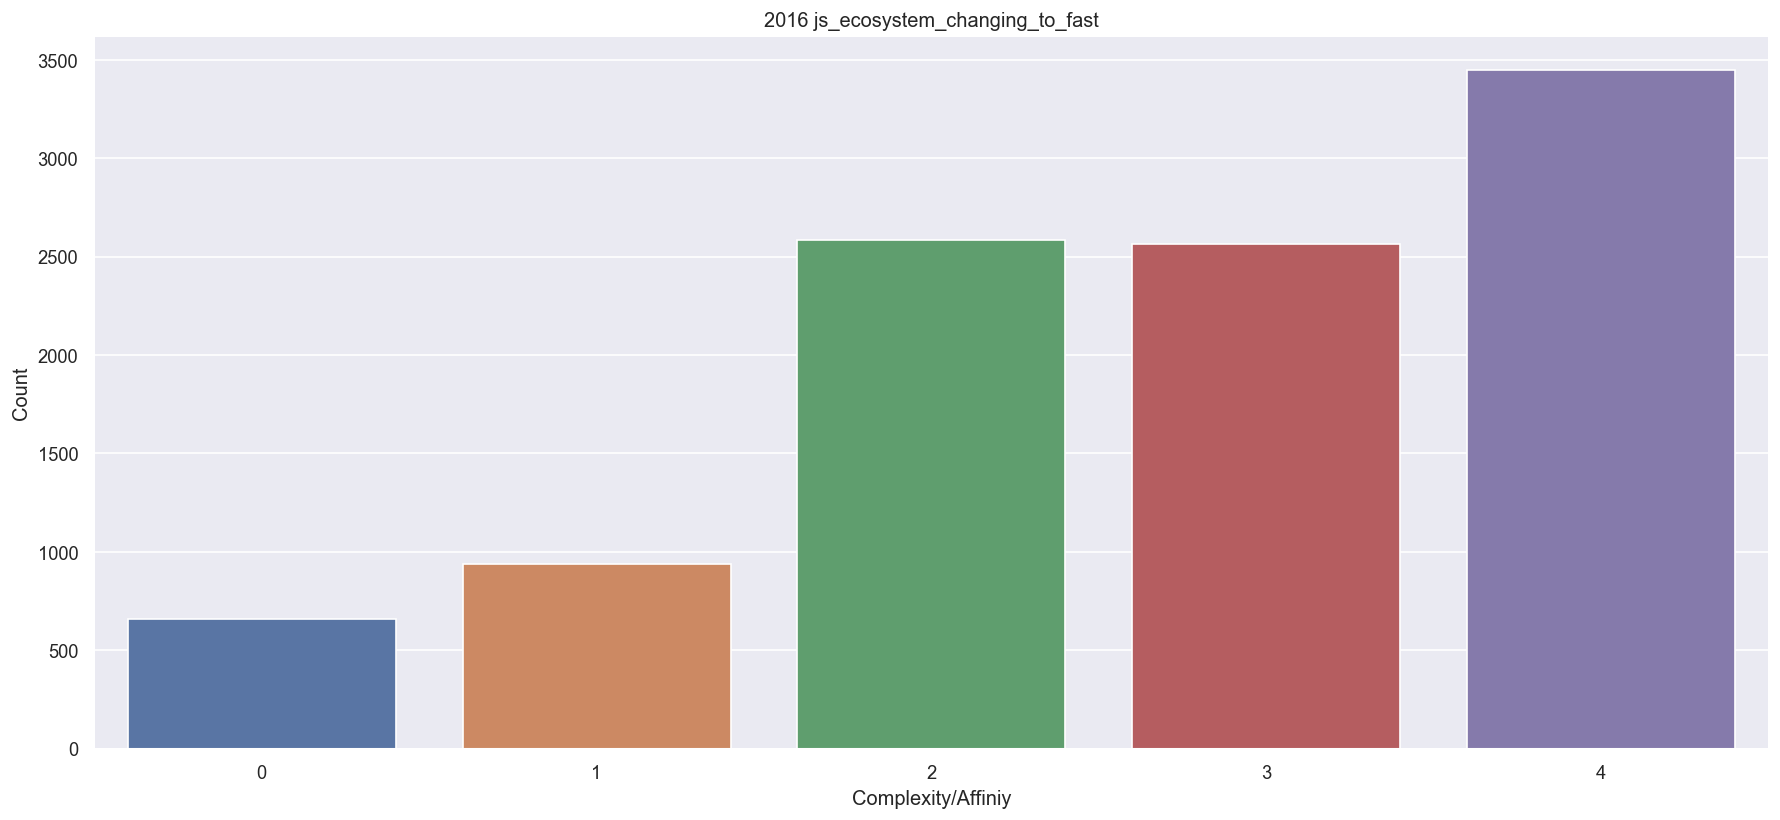

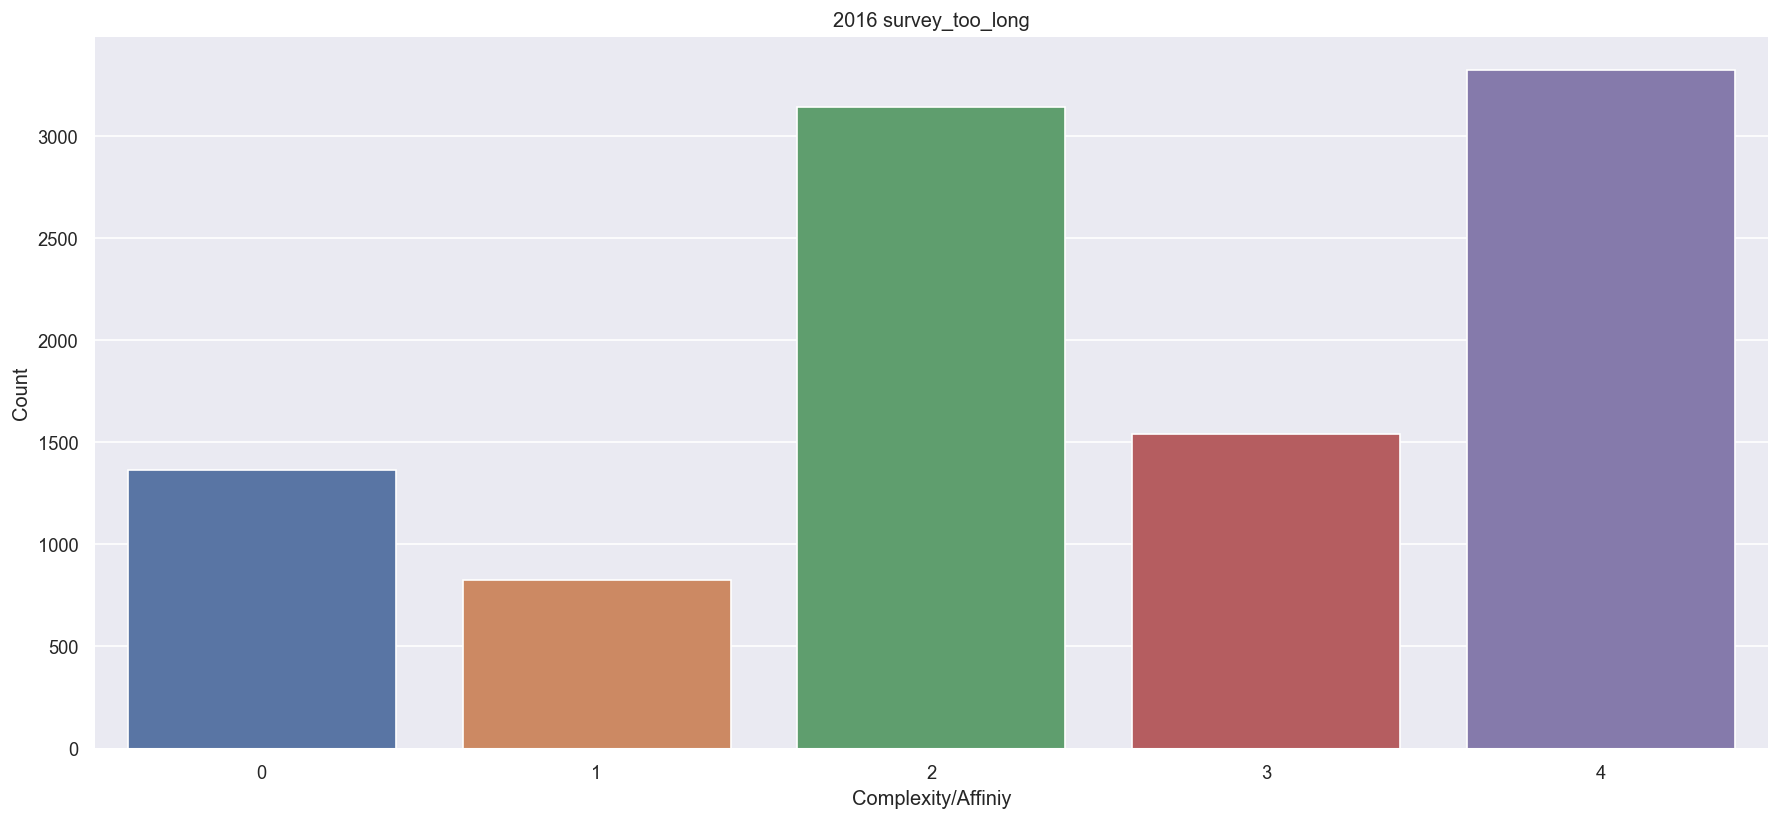

In [718]:
for i in Opinions_dict_DF:
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='Complexity/Affiniy',y='Count',data=Opinions_dict_DF[i])
    ax.tick_params(axis = 'x', rotation = 0)
    ax.set_title('2016 '+i)
    f.tight_layout()
    f.savefig(fname='img/2016/'+i+'dist_2016.png',format='png',dpi=150)
    plt.show()